> # Before we begin:

I'm a Newcomer to machine learning and data science. This is my **first** machine learning project, and I'm using the Titanic dataset, which is the most popular dataset on Kaggle. I tried to interpret the codes and explain my points about why I did this step to make this notebook easier to read and interpret. I kept any code I used in any step if anyone wanted to try it on his own. I welcome your feedback on anything in this notebook to help me improve my code and get the best possible results.


> **So let's begin**.

# **1. Define Goal**
The first step in any project is to define the problem we want to solve. In our case, Kaggle provides us to build a model to predict which passengers survived in the test file with the highest possible accuracy.

# **2. Exploratory Data Analysis**

###    **2.1 Import libraries**

In [1]:
# Import data processing and manipulation packages.
import numpy as np
import pandas as pd

# Visualizing packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style and color pqlette.
sns.set(style= "white", palette= "deep")

# Show plots directly in the notebook.
%matplotlib inline

# Import Machine learning packages
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler


# Import machine learning models
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### **2.2 load Data**

We load and combine the two files into a single data frame for cleaning. Column descriptions are available [here](https://www.kaggle.com/competitions/titanic/data).

In [2]:
# load train & test data as DataFrames
train_df= pd.read_csv("../input/titanic/train.csv")
test_df= pd.read_csv("../input/titanic/test.csv")

# Set dataframes name
train_df.name= "Training set"
test_df.name= "Test set"

# create list for looping.
combine= [train_df, test_df]

# Concatened the two file inton one dataframe
all_dfs= pd.concat([train_df ,test_df] ,ignore_index= True)

### **2.3 Understand Data**

###    2.3.1 Understand the Training set

In [3]:
# View first rows of the data.
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# show train_df informations
train_df.info()
print(f"\n * train_df has {train_df.shape[1]} columns and {train_df.shape[0]} rows.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

 * train_df has 12 columns and 891 rows.


In [5]:
# Summary of Non-Numerical Columns of the Dataset
train_df.describe(include= "O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
# show summary Statistics of numeric data
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* **Columns types: -**
 - Fare and age are two **numeric* columns in the dataset. 
 - SibSp and Parch are numeric columns with discrete and finite values. Therefore, we treat them as **category** types. 
 - Survived, Pclass, Name, Sex, Ticket, Cabin, and Embarked are **categorical** columns.

In [7]:
# features names lists by type in the datasets.
num_cols= ["Age", "Fare"]

train_cat_cols = ["Survived", "Pclass", "Sex", "Embarked", "SibSp", "Parch"]

test_cat_cols = ["Pclass", "Sex", "SibSp" ,"Parch" ,"Embarked"]

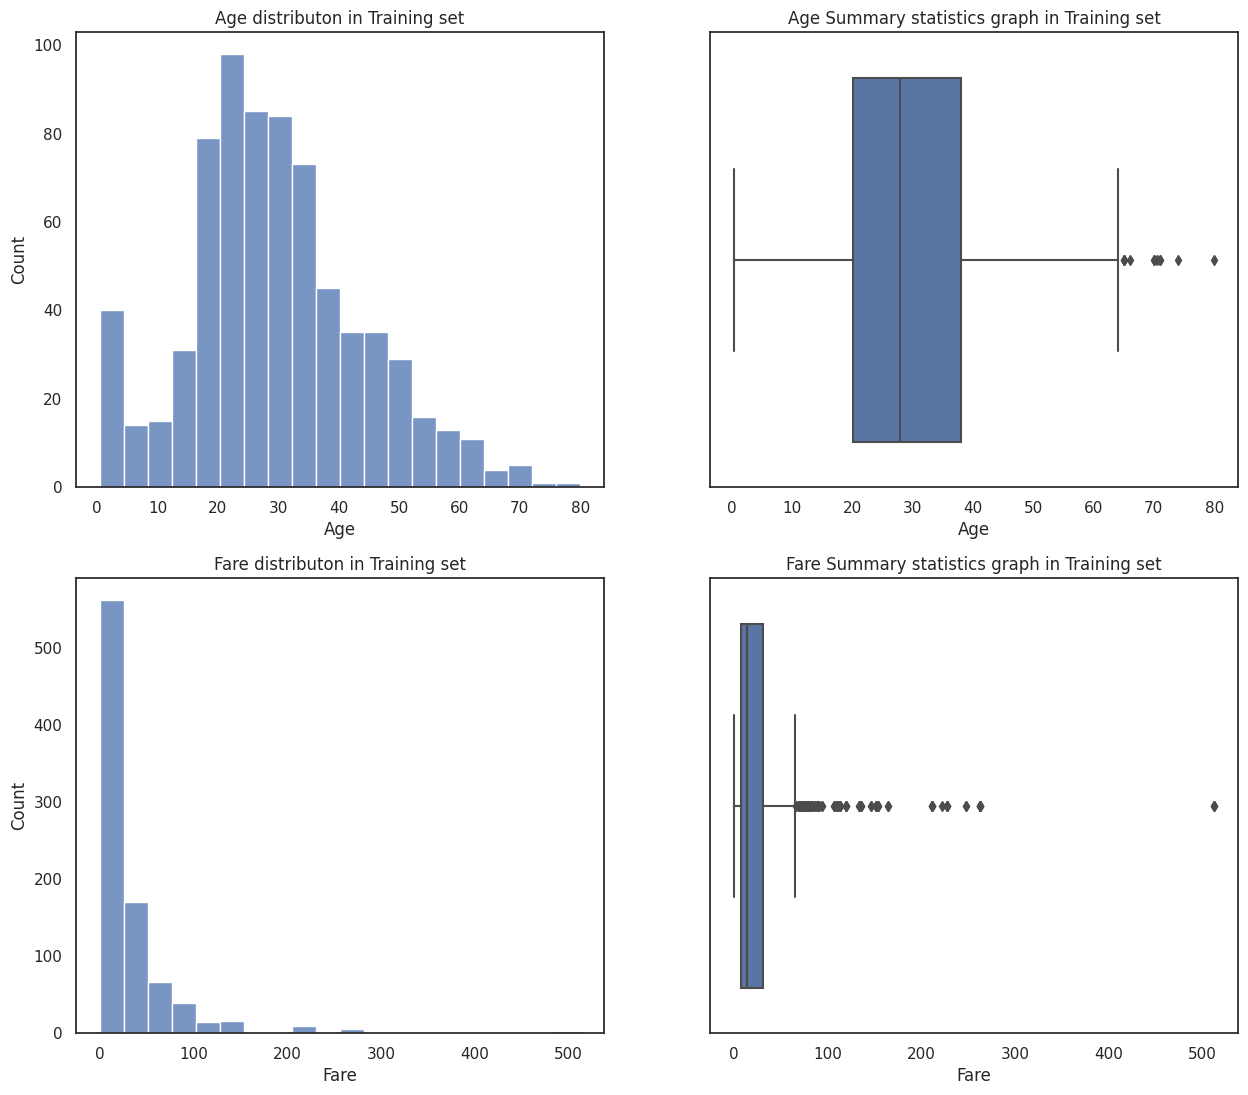

In [8]:
# Plot numerical columns distribution.
fig, axes= plt.subplots(2, 2, figsize= (15, 13))

# Looping for plot numeric features distributions
for i, col in enumerate(num_cols):
    # plot Histograms
    sns.histplot(data= train_df, x= col ,bins= 20 ,ax= axes[i][0])

    # Plot boxplots
    sns.boxplot(data= train_df, x= col , ax= axes[i][1])

    # set cahrt title
    axes[i][0].set(title= f"{col} distributon in {train_df.name}")
    axes[i][1].set(title= f"{col} Summary statistics graph in {train_df.name}")

# show plots
plt.show()

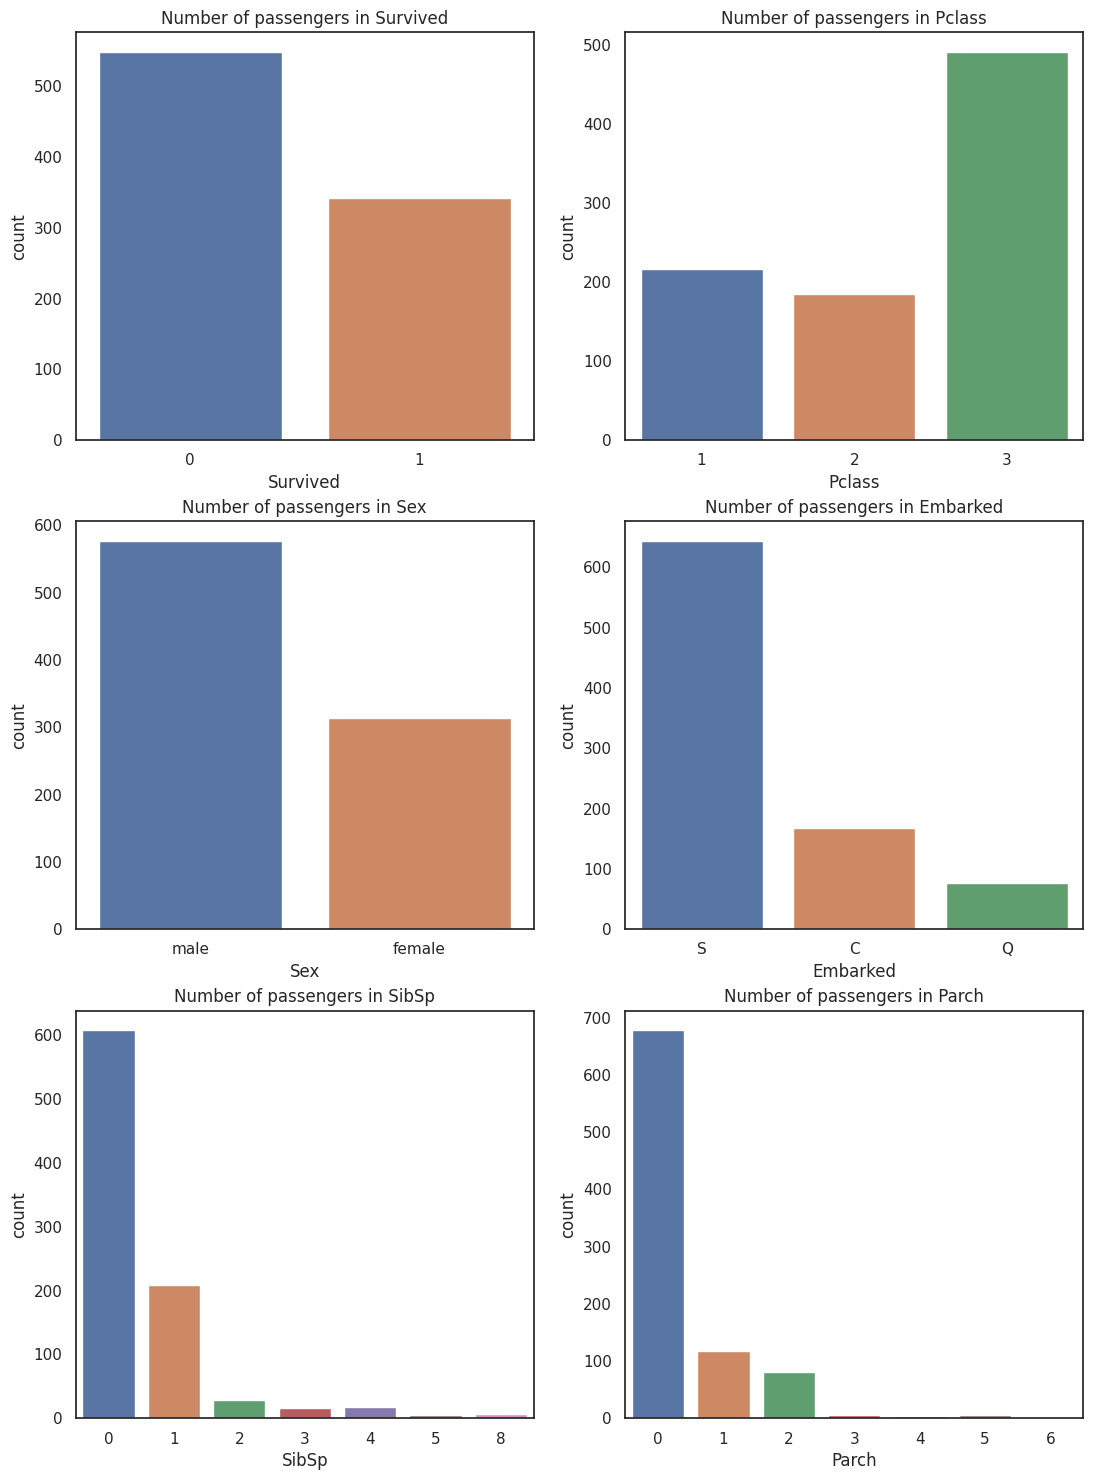

In [9]:
# Plot categorical features distributions. 
fig= plt.subplots(figsize=(13, 18))

for i, col in enumerate(train_cat_cols ,1):
    plt.subplot(3, 2, i)    
    sns.countplot(x=col ,data=train_df)
    plt.title(f"Number of passengers in {col}")
    
plt.show()

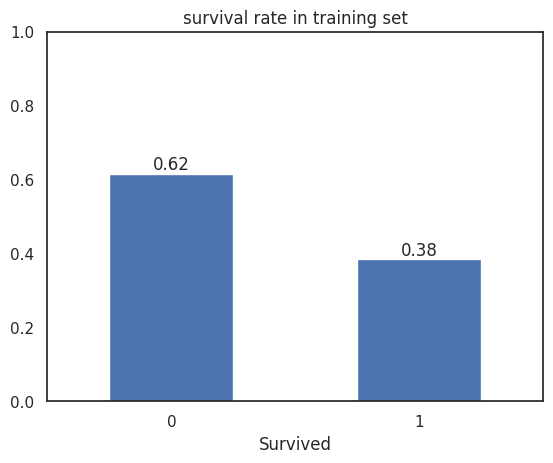

In [10]:
# Survival rate in train_df
survived_avg= train_df["Survived"].value_counts(normalize= True)

# create bar plot
ax= survived_avg.plot(kind="bar", ylim= (0, 1), title= "survival rate in training set", rot=0)

# Add labels to the bars
ax.bar_label(ax.containers[0], fmt= "%0.2f")

# Sow polt
plt.show()

## **Initial observations on train_df**:
- **Age, Cabin, and Embarked** columns have missing values. We'll find out their number shortly.
- **Survived** column is the target variable.
- Most of the passengers were males.
- Our data suggests that **38%** of passengers survived, but the actual survival rate was 32%((2224 - 1502)/ 2224).
- 75% of passengers paid a fare of less than $32.
- Most of the passengers were less than 38 years old.
- Numerical columns have different scales. So, we may need to standardize before modeling.
- Most passengers were male, Third class, Alone, and boarded in Southampton (S).
- There are outliers in numerical columns.
- Age range in the training set is widder than test set.
- most of passengers in the datasets are between 20 and 40 years old.


## 2.3.2 Understand testing Data
* We repeat the previous code lines on the test_df DataFrame.

In [11]:
# View first rows of the data.
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
# show test_df informations
test_df.info()
print(f"\n * test_df has {test_df.shape[1]} columns and {test_df.shape[0]} rows.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB

 * test_df has 11 columns and 418 rows.


In [13]:
# Summary of Non-numerical columns of the dataset.
test_df.describe(include= "O")

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [14]:
# show summary Statistics 
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


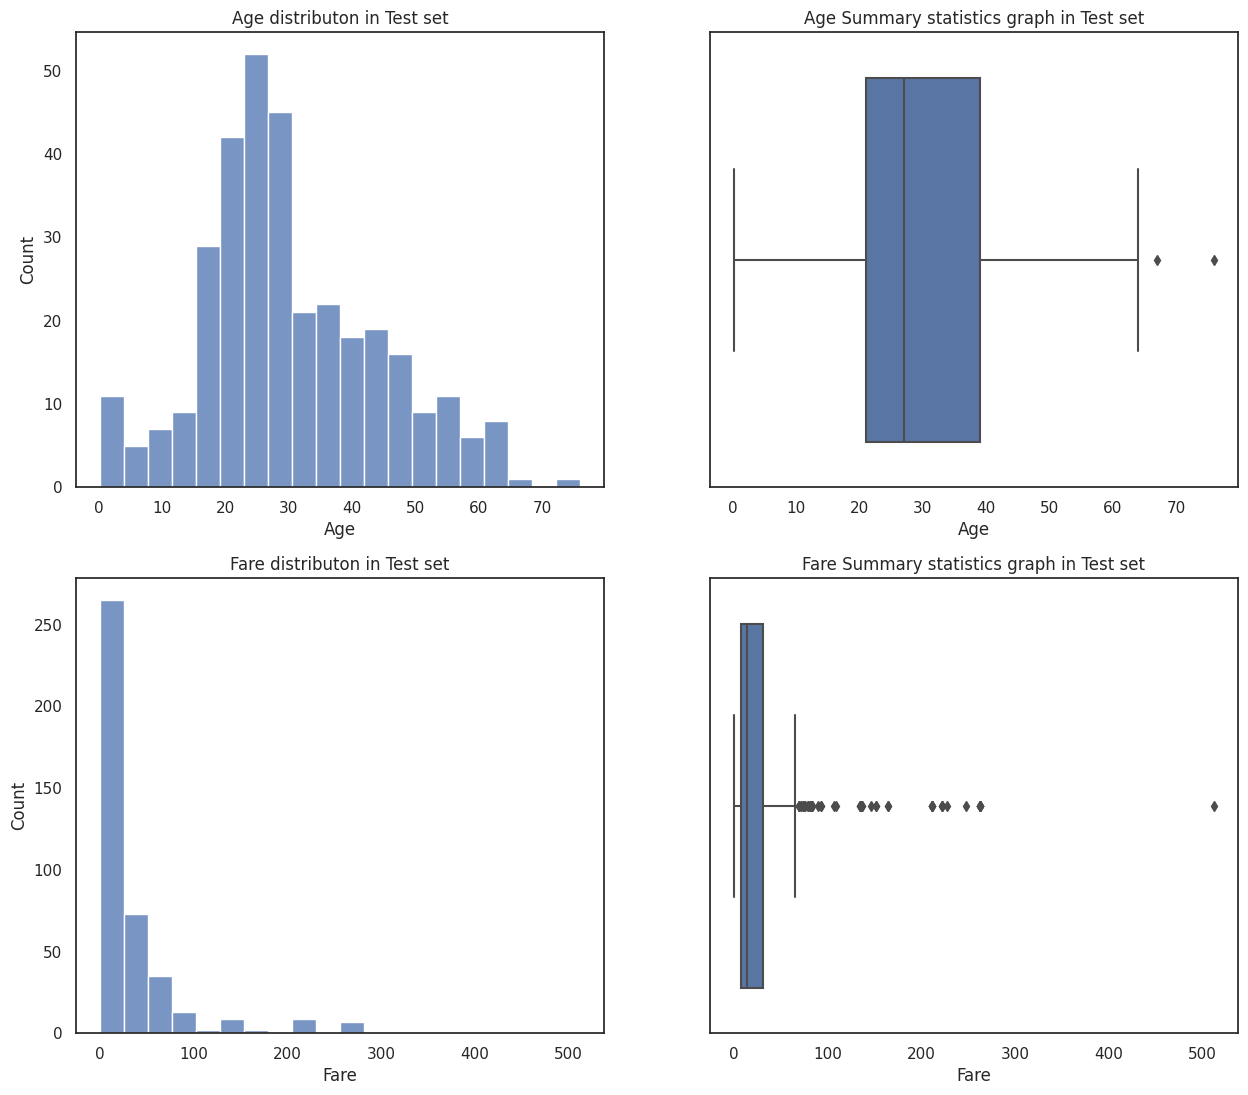

In [15]:
# Plot numerical columns distribution.
fig, axes= plt.subplots(2, 2, figsize= (15 ,13))

# Looping for plot numeric features distributions
for i, col in enumerate(num_cols):
    # plot Histograms
    sns.histplot(data= test_df, x= col ,bins= 20 ,ax= axes[i][0])

    # Plot boxplots
    sns.boxplot(data= test_df, x= col , ax= axes[i][1])

    # set cahrt title
    axes[i][0].set(title= f"{col} distributon in {test_df.name}")
    axes[i][1].set(title= f"{col} Summary statistics graph in {test_df.name}")

# show plots
plt.show()

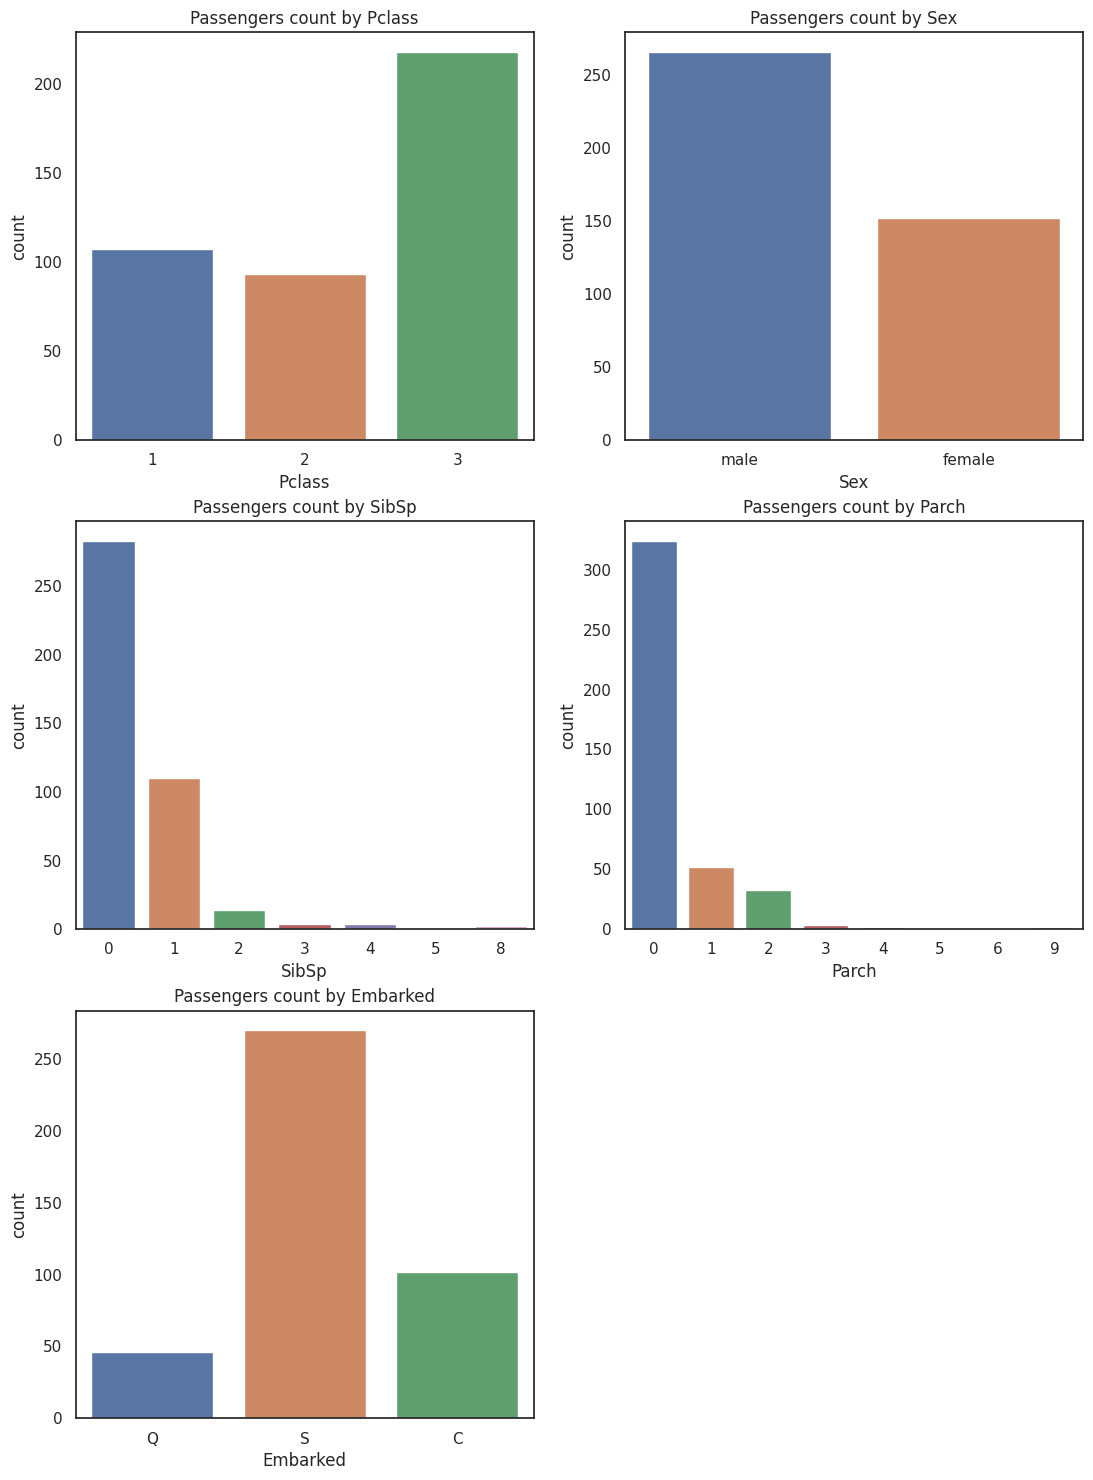

In [16]:
# Plot categorical features distributions. 
fig= plt.subplots(figsize=(13, 18))

for i, col in enumerate(test_cat_cols ,1):
    plt.subplot(3, 2, i)    
    sns.countplot(x=col ,data=test_df)
    plt.title(f"Passengers count by {col}")
plt.show()

## **Initial observations on test_df**:
   **The same train set observation. However: -**
- **Age, Cabin, and Fare** columns have missing values and we'll find out their number shortly.
- Test_df set doesn't contain a **Survived** feature here.

## **2.4 Data cleaning**

### 2.4.1 check duplicates

In [17]:
# check duplicated rows in the data.
print(f"The training set has {train_df.duplicated().sum()} duplicates.\n")
print(f"Test set has {test_df.duplicated().sum()} duplicates.")

The training set has 0 duplicates.

Test set has 0 duplicates.


## 2.4.2 Outliars

In [18]:
#Create quantiles
for df in combine:
    for col in num_cols:
        # Create third and First quartiles
        q_25= df[col].quantile(0.25)
        q_75= df[col].quantile(0.75)
        
        # Create IQR
        IQR= q_75 - q_25
        
        # Create Lower and Upper limits
        upper= q_75 + 1.5* IQR
        lower= q_25 - 1.5* IQR
        
        # ouliars rows
        outliars_data= df[(df[col] > upper) | (df[col] < lower)]
        
        # Count outliars values in each dataset numeric columns.
        print("There are ", outliars_data[col].nunique(),f"olutliers in The {col} column in {df.name}.\n")
        
        # view outliars data in each dataframe
#         print(f"Outliars rows in {df.name} for {col} column:\n")
#         print(outliars_data.head())

There are  7 olutliers in The Age column in Training set.

There are  45 olutliers in The Fare column in Training set.

There are  2 olutliers in The Age column in Test set.

There are  29 olutliers in The Fare column in Test set.



## 2.4.3 Missing values

In [19]:
# Count Null values in each column.
for df in combine:
    null_cols= df.columns[df.isna().sum() >0]
    print(f"Missing values number in each column in {df.name}:")
    print(df[null_cols].isna().sum(), "\n")

Missing values number in each column in Training set:
Age         177
Cabin       687
Embarked      2
dtype: int64 

Missing values number in each column in Test set:
Age       86
Fare       1
Cabin    327
dtype: int64 



In [20]:
# View missing row in Embarked column from Train_df
train_df[train_df["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [21]:
# View missing row in Fare column from test_df
test_df[test_df.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


## **Missing values Observation**:
- The **cabin** column has too many missing data to be reliable, even after imputation. Therefore, we drop it. 
- We will impute missing **Age** values with the median Age value for each **title** group (we create a title column after a while).
- The null rows in the **Embarked** column all have the same **ticket, fare, and cabin** values, suggesting that they may have known each other and boarded from the same embarkation point. We got help from "Bard", who told us they boarded from **Southampton (S)**.
- We will impute missing **Fare** values with the median Fare value for the third **class** and S **Embarked** group.

In [22]:
# Impute Embarked null rows
train_df["Embarked"].fillna("S", inplace= True)

In [23]:
# get third class Southampton port Fare median value
median_Fare_value= all_dfs.loc[(all_dfs['Pclass'] ==3) & (all_dfs["Embarked"]== "S")]["Fare"].median()

# Impute Fare null rows
test_df["Fare"].fillna(median_Fare_value, inplace= True)

* **In general, titles are associated with age and marital status**, which can be used to improve the accuracy of age imputation. We will extract the name's title from the Name column to use it.

In [24]:
# Create title column
for df in [all_dfs ,train_df ,test_df]:
    df["title"]= df["Name"].str.split("[.,]", expand= True)[1].str.strip()

In [25]:
### If you want to see median Age value by "Embarked" ,"Pclass" ,and "title" columns

# # Count rows by Pclass and title groups 
# pclass_title_grouped= all_dfs.groupby(["Embarked" ,"Pclass", "title"]).agg({"title": "count" ,
#                                                                            "Age": "median"})

# # Count Null values by Pclass and title groups
# nulls_count= all_dfs[all_dfs.Age.isna()].groupby(["Embarked" ,"Pclass", "title"]).size()

# # combin counts in dict
# title_dict= {
#     "freq": pclass_title_grouped["title"],
#     "nulls_count": nulls_count ,
#     "median_Age": pclass_title_grouped["Age"]
# }

# # Create title dataframe frequency
# title_df= pd.DataFrame(title_dict).fillna(0).reset_index()

# # View titles have Nulls only
# title_df[title_df.nulls_count >0]

- Now, we are confident about the titles count.  We can use them in imputation.
- In the third class, the Ms title group in test_df has only one null value. Therefore, we will impute it in a separate line of code using the median of the entire Ms group.

In [26]:
# fill Ms null value in the Age column in test_df.
test_df.loc[(test_df["title"]== "Ms") & (test_df["Age"].isna()), "Age"]= all_dfs[all_dfs["title"]== "Ms"]["Age"].median()

# Fill missing values in Age by median of Embarked, Pclass, and title groups.
for df in [train_df ,test_df]:
    df["Age"]= df.groupby(["Embarked", "Pclass", "title"])["Age"].transform(lambda x: x.fillna(x.median()))

In [27]:
# check null values
print("Missing values count in training set: \n" ,train_df.isna().sum())
print("\nMissing values count in test set: \n" ,test_df.isna().sum())

Missing values count in training set: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
title            0
dtype: int64

Missing values count in test set: 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
title            0
dtype: int64


### **2.5 Creating columns**
> Create new columns from the existing columns to better represent the data and make it more informative for machine learning models. This is also one step of feature engineering.
   - We will minimize unique values in the Title column by replacing the uncommon titles with common ones for analysis.
   - We will create AgeBin and FareBin columns to group Age and Fare columns.   
   - We will also create with_group and Is_alone columns to identify the passenger's status as a group member or Alone passenger.

In [28]:
# tilte dictionary 
similar_titles= {"Mlle":"Miss", "Dona":"Mrs" ,"the Countess":"Mrs" ,"Ms":"Mrs" ,"Mme":"Mrs" ,"Lady":"Mrs"
                ,"Jonkheer":"Mr" ,"Capt":"Mr" ,"Col":"Mr" ,"Dr":"Mr" ,"Sir":"Mr" ,"Don":"Mr" ,"Rev":"Mr" ,"Major":"Mr"}

# replace the only female doctor.
train_df.loc[(train_df.Sex== "female") & (train_df.title == "Dr"), "title"]= "Mrs" 

# Minimize title groups
for df in [train_df ,test_df]:
    df["title"]= df.title.replace(similar_titles)

# Show unique title values
train_df.title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

* As we saw above, the two missing values in the Embarked column were together, although they didn't have any SibSp or parch. Therefore, we will create the with_group column to identify whether a passenger is alone or with a group of either family or friends.
- We create an Is_Alone column to determine whether the passenger is alone if he doesn't have any SibSp or Parch and was not in the group.

In [29]:
# Create with_group column
for df in combine:
    df["with_group"]= df.groupby("Ticket")["Ticket"].transform(lambda x: 1 if x.count() >1 else 0)

    # Create Is_Alone column
    df["Is_Alone"]= 0
    df.loc[(df["SibSp"]==0) & (df["Parch"]==0) & (df["with_group"]==0), "Is_Alone"]= 1

In [30]:
# Create Age_grouped column from the Age column
life_circle= ["Infant", "Child", "Teen", "Emerging adulthood", "Young adulthood" ,"Middle adulthood","Elderly"]
ages= [0, 3, 12, 18, 25, 39 ,64, np.inf]

for df in combine:
    df["AgeBin"]= pd.cut(df["Age"], labels= life_circle, bins= ages)

# show sample of Age and aged_grouped columns
train_df[["Age" ,"AgeBin"]].sample(5)

,Age,AgeBin
137,37.0,Young adulthood
797,31.0,Young adulthood
29,26.0,Young adulthood
369,24.0,Emerging adulthood
490,26.0,Young adulthood


* I googled about the Titanic classes and found that Second Class contains (D-deck, E-deck, and F-deck) subclasses and First Class contains (A-deck, B-deck, C-deck, Berth, and Suite) subclasses. But, because of discounts on tickets and some tickets being free, we can't combine the Pclass and Fare columns in one column it is only possible to group the Fare column into five groups.

In [31]:
# Create the Titanic Subclasses list
groups= range(5)

# Create Fare_grouped column from the Fare column in two dataframes.    
for df in combine:
    # Create Fare quantiles.
    min_value= df.Fare.min() -1  # We subtract one from the fare to account for all fares.
    q_20= df.Fare.quantile(0.2)
    q_40= df.Fare.quantile(0.4)
    q_60= df.Fare.quantile(0.6)
    q_80= df.Fare.quantile(0.8)
   
    
    # Minimum Subclass Fare list
    Minimum_fare= [min_value, q_20, q_40 ,q_60 ,q_80 ,np.inf]

    # Create FareBin column
    df["FareBin"]= pd.cut(df["Fare"], labels= groups ,bins= Minimum_fare )

# show sample of Fare and Fare_grouped columns
test_df[["Fare" ,"FareBin"]].sample(5)

,Fare,FareBin
341,7.5792,0
245,51.8625,4
237,7.2250,0
130,8.0500,1
244,23.4500,3


# **2.6 Visualize data and find Patterns**
### 2.6.1 Correlation of features. 

In [32]:
## retain high correlation coeffitients only.

# view features correlation for  the training set
train_data_corr= train_df.drop("PassengerId" ,axis= 1).corr(numeric_only= True).stack().to_frame(name= "correlation_coef")

# drop low and redundant coef values
train_data_corr= train_data_corr.drop(train_data_corr[train_data_corr["correlation_coef"]==1.0].index)

train_data_corr= train_data_corr.drop(train_data_corr[(train_data_corr["correlation_coef"]> -0.1)
                                                      & (train_data_corr["correlation_coef"]< 0.1)].index)
# round to 2 Decimal.
train_data_corr["correlation_coef"]= np.round(train_data_corr["correlation_coef"], 2)

# Show unique correlations
print(f"High correlation coefficients between {train_df.name} columns:\n")
train_data_corr.drop_duplicates(keep="first")

High correlation coefficients between Training set columns:



correlation_coef
Survived   Pclass                 -0.34
           Fare                    0.26
           with_group              0.22
           Is_Alone               -0.24
Pclass     Age                    -0.41
           Fare                   -0.55
           with_group             -0.21
Age        SibSp                  -0.27
           Parch                  -0.19
           Fare                    0.12
           with_group             -0.17
           Is_Alone                0.16
SibSp      Parch                   0.41
           with_group              0.44
           Is_Alone               -0.49
Parch      with_group              0.47
Fare       with_group              0.43
           Is_Alone               -0.40
with_group Is_Alone               -0.82

In [33]:
# view features correlation for test set
test_data_corr= test_df.drop("PassengerId", axis= 1).corr(numeric_only= True).stack().to_frame(name= "correlation_coef")

# drop low and redundant coef values
test_data_corr= test_data_corr.drop(test_data_corr[test_data_corr["correlation_coef"]==1.0].index)
test_data_corr= test_data_corr.drop(test_data_corr[(test_data_corr["correlation_coef"]> -0.1)
                                                      & (train_data_corr["correlation_coef"]< 0.1)].index)
test_data_corr["correlation_coef"]= np.round(test_data_corr["correlation_coef"], 2)

# Show unique correlations
print(f"High Correlation coefficients between {test_df.name} columns:\n")
test_data_corr.drop_duplicates(keep="first")

High Correlation coefficients between Test set columns:



correlation_coef
Pclass     Age                    -0.53
           SibSp                   0.00
           Parch                   0.02
           Fare                   -0.58
           with_group             -0.23
           Is_Alone                0.25
Age        Fare                    0.34
SibSp      Parch                   0.31
           Fare                    0.17
           with_group              0.35
           Is_Alone               -0.56
Parch      Fare                    0.23
           with_group              0.40
           Is_Alone               -0.45
Fare       with_group              0.43
           Is_Alone               -0.41
with_group Is_Alone               -0.61

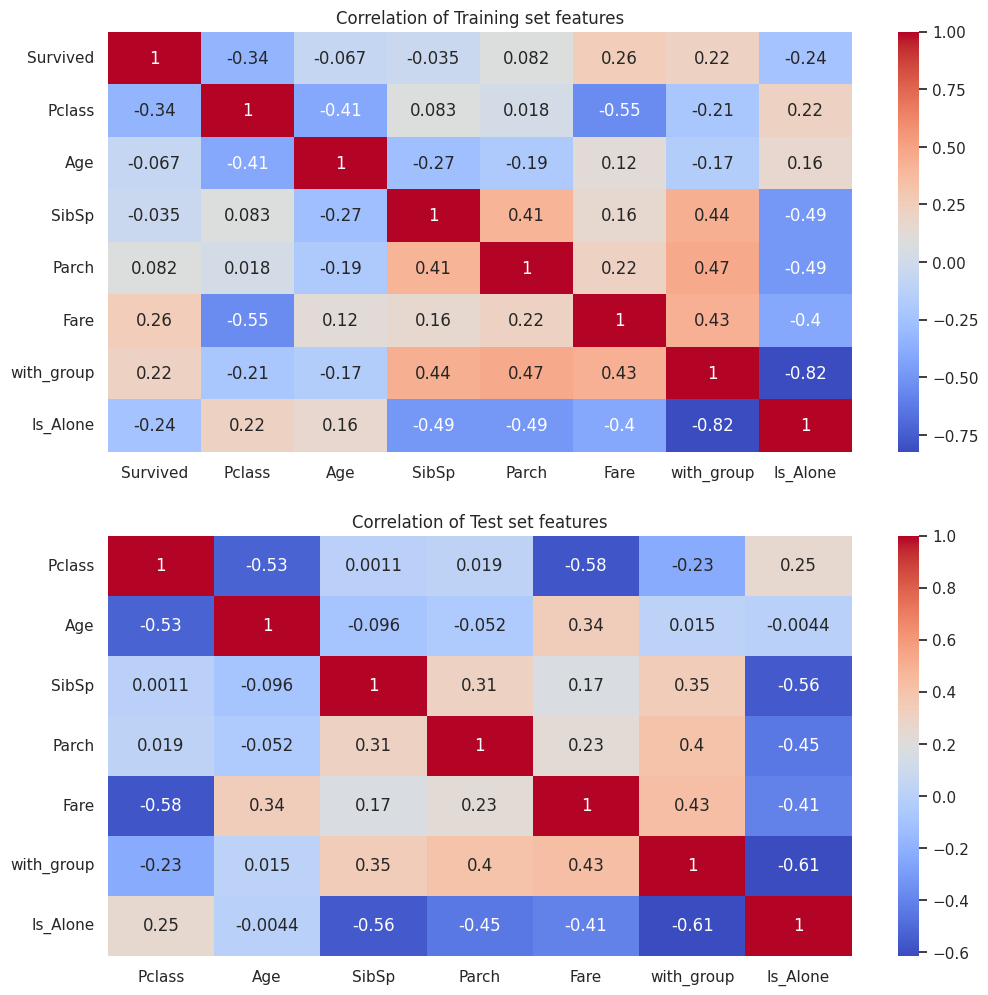

In [34]:
# plot features correlation
fig, axes= plt.subplots(nrows=2, figsize=(12,12))

for i, df in enumerate(combine):
    # heatmap for dataset
    sns.heatmap(df.drop("PassengerId", axis= 1).corr(numeric_only= True) ,cmap= "coolwarm", annot= True, ax= axes[i])

    # set title to plots
    axes[i].set_title(f"Correlation of {df.name} features")

plt.show()

### 2.6.2 Explore data

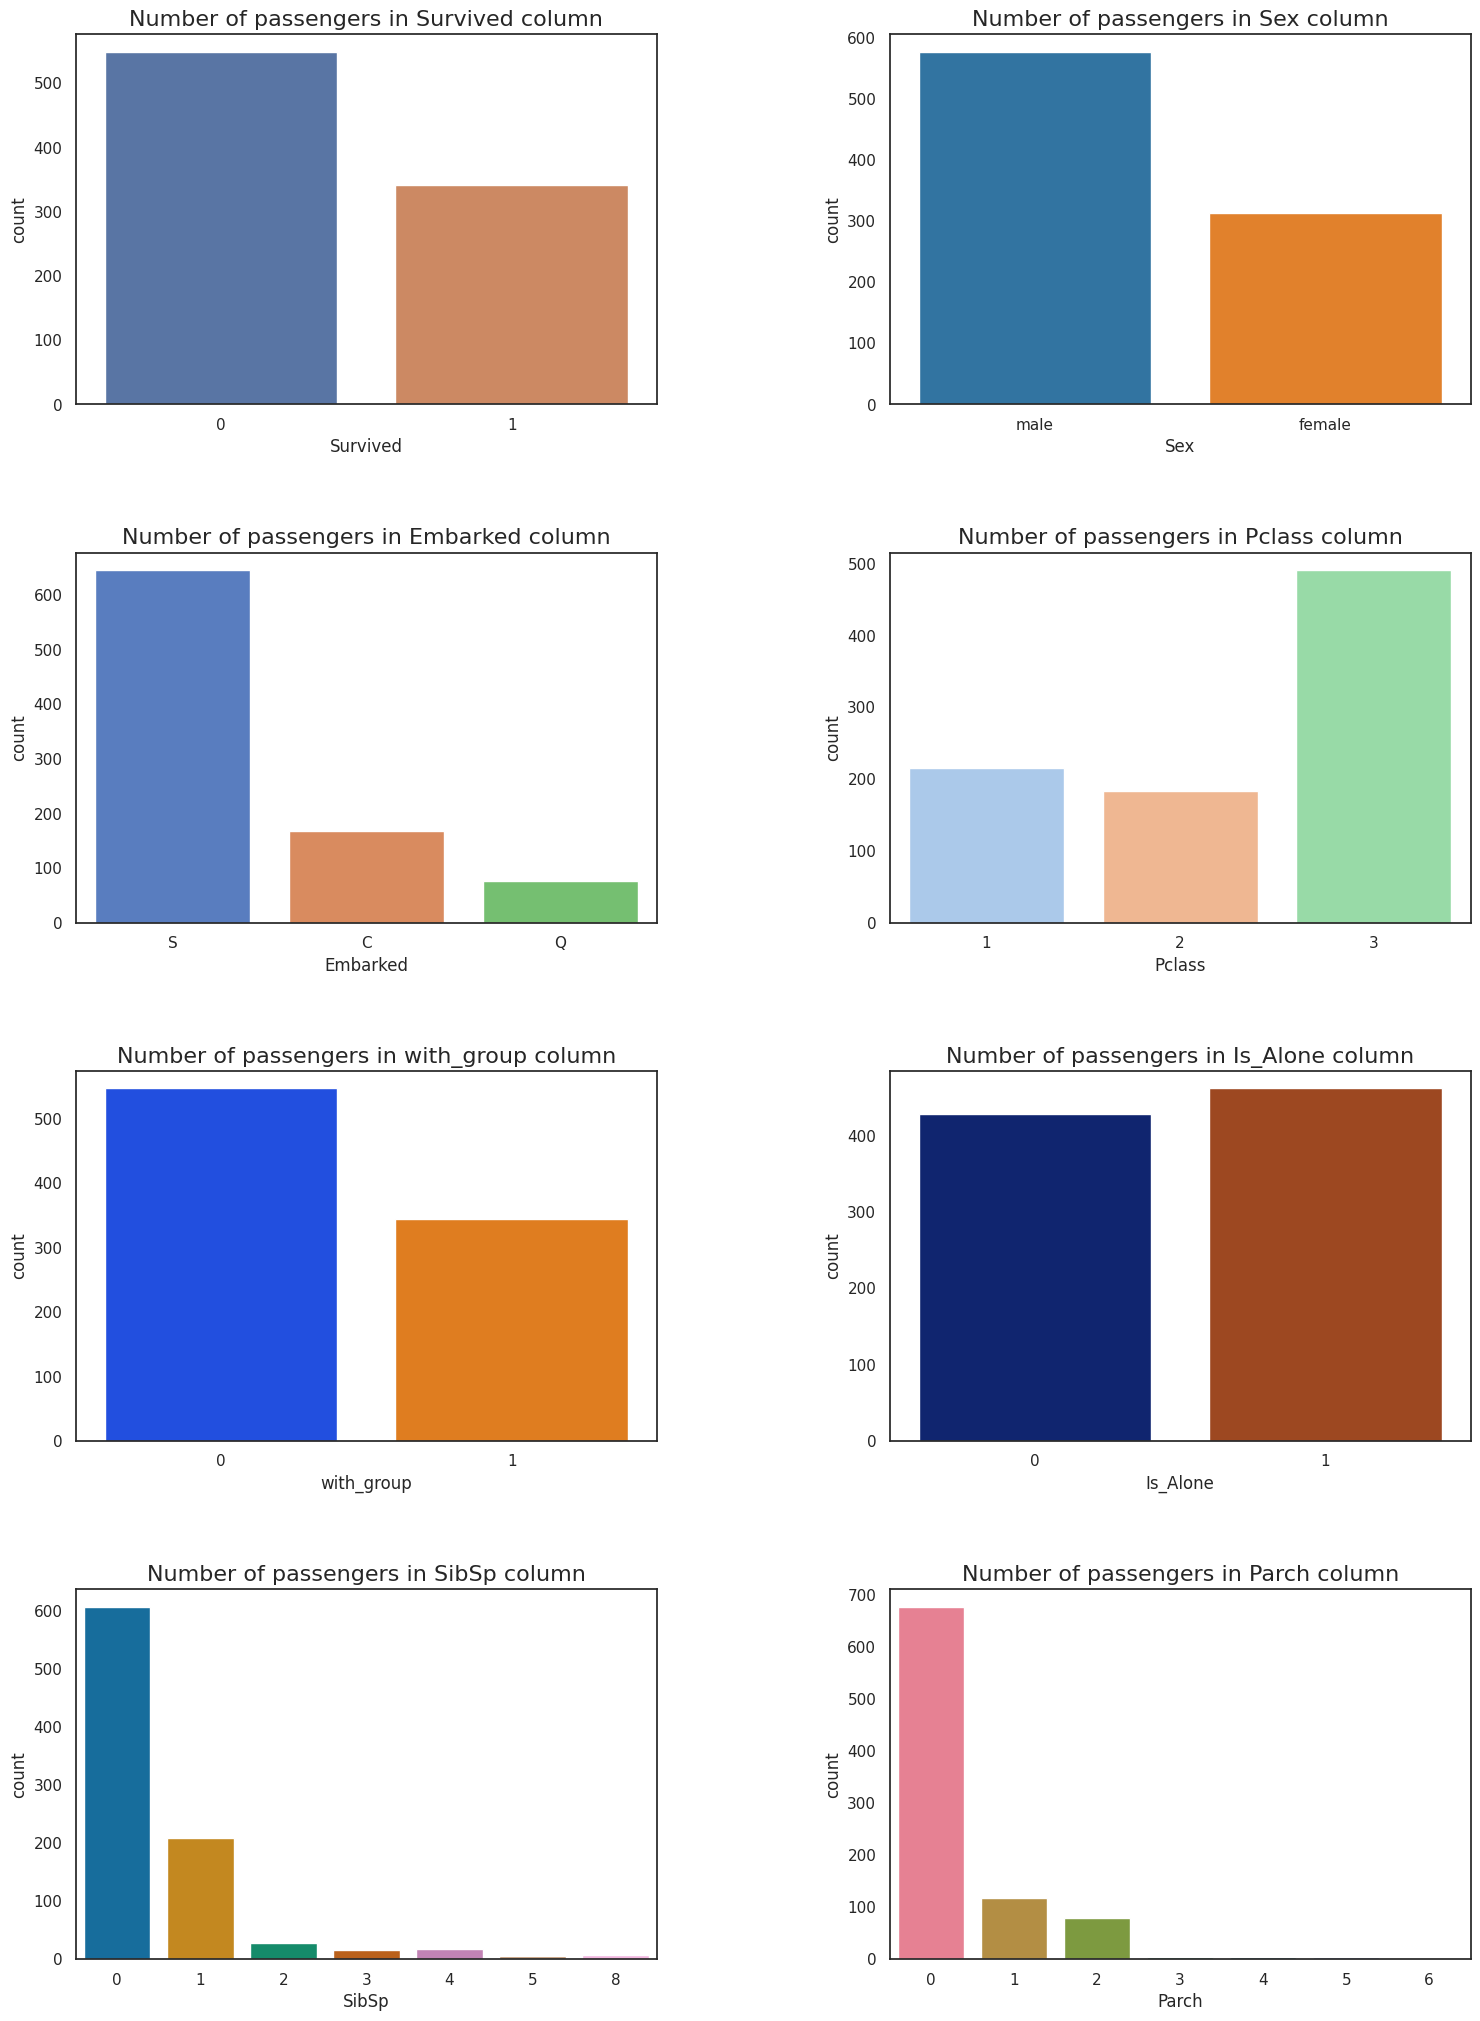

In [35]:
# columns list for looping
cols= ["Survived", "Sex", "Embarked", "Pclass", 'with_group', 'Is_Alone', "SibSp", "Parch"]

# create palettes list
palettes= ["deep", "tab10", "muted", "pastel", "bright", "dark", "colorblind", "husl"]

# Set palette index
k=0

# Rows Number in subplot 
rows_num= int(np.round((len(cols)/ 2),0))

# set plot size
fig= plt.figure(figsize= (18, 25))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Plot passenger count by column clusters
for i, col in enumerate(cols, 1):
    plt.subplot(rows_num, 2, i)
    # plot Number of passengers.
    sns.countplot(data= train_df, x= col, palette= palettes[k])
    
    # Set charts title
    plt.title(f"Number of passengers in {col} column", fontdict= {'fontsize': 16})
    k +=1
    
# Show plot
plt.show()

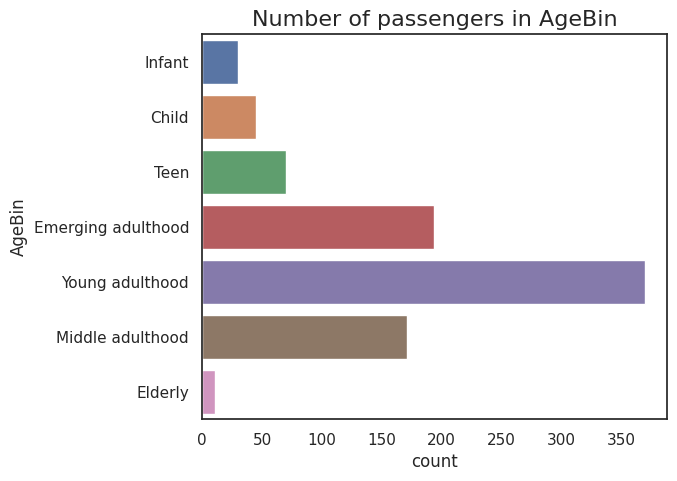

In [36]:
# set plot size
fig= plt.figure(figsize= (6, 5))

# plot Number of passengers in AgeBin.
g= sns.countplot(data= train_df, y= "AgeBin", orient= "h")

# Set charts title
plt.title("Number of passengers in AgeBin", fontdict= {'fontsize': 16})

# Show plot
plt.show()

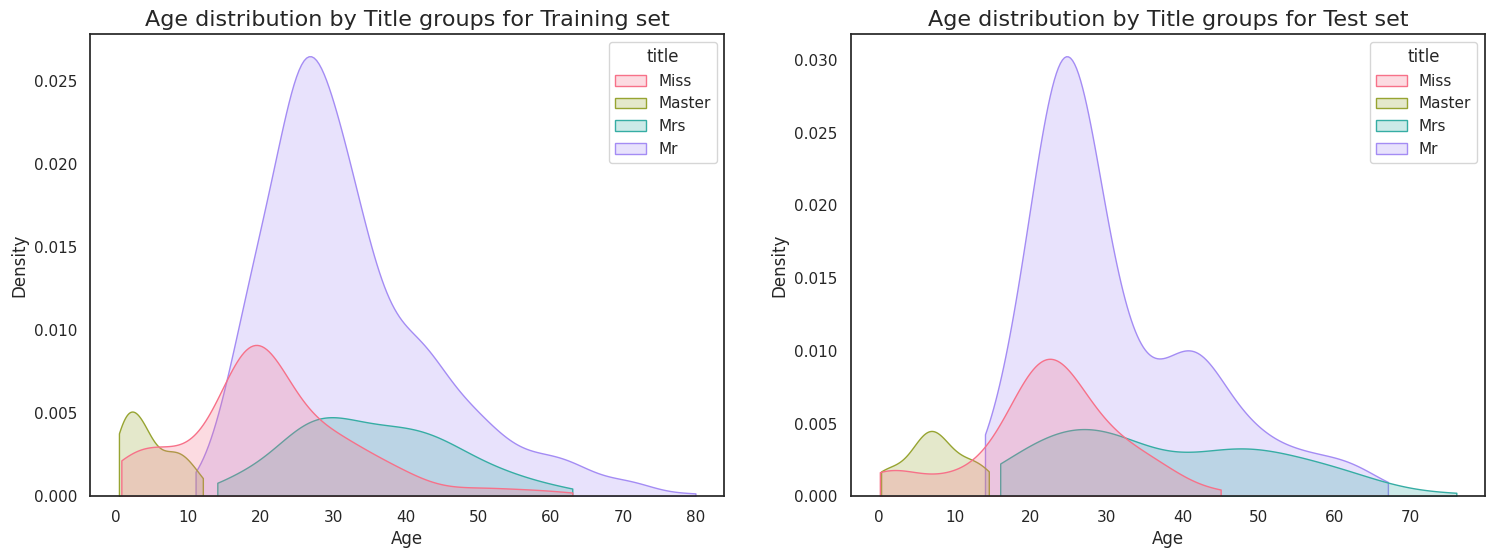

In [37]:
# set chart size
fig, axes= plt.subplots(1,2, figsize=(18, 6))

# plot Age distribution by Title groups.
for i, df in enumerate(combine):
    sns.kdeplot(data= df,x= "Age", hue= "title", shade= True, cut= 0, palette= "husl", hue_order=["Miss", "Master", "Mrs", "Mr"], ax= axes[i])
    
    # create  chart title 
    axes[i].set_title(f"Age distribution by Title groups for {df.name}", size= 16)
    
# plot chart
plt.show()

* **Pclass plots**

Text(0.5, 1.0, 'Fare distribution by Pclass')

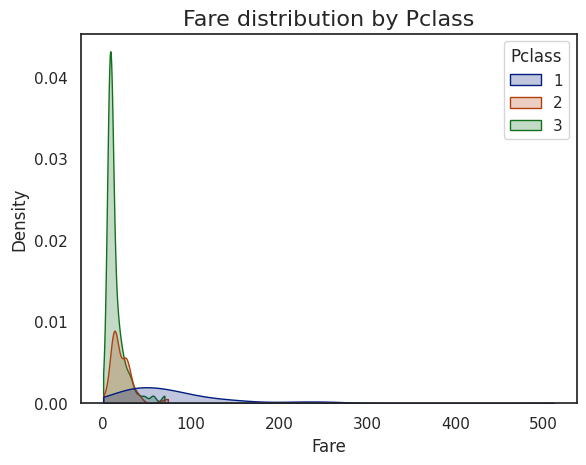

In [38]:
# Plot Fare distribution by Pclass
sns.kdeplot(data= train_df, x= "Fare", hue="Pclass", shade= True, cut=0, palette= "dark")

# Set chart title
plt.title("Fare distribution by Pclass", fontdict= {'fontsize': 16})

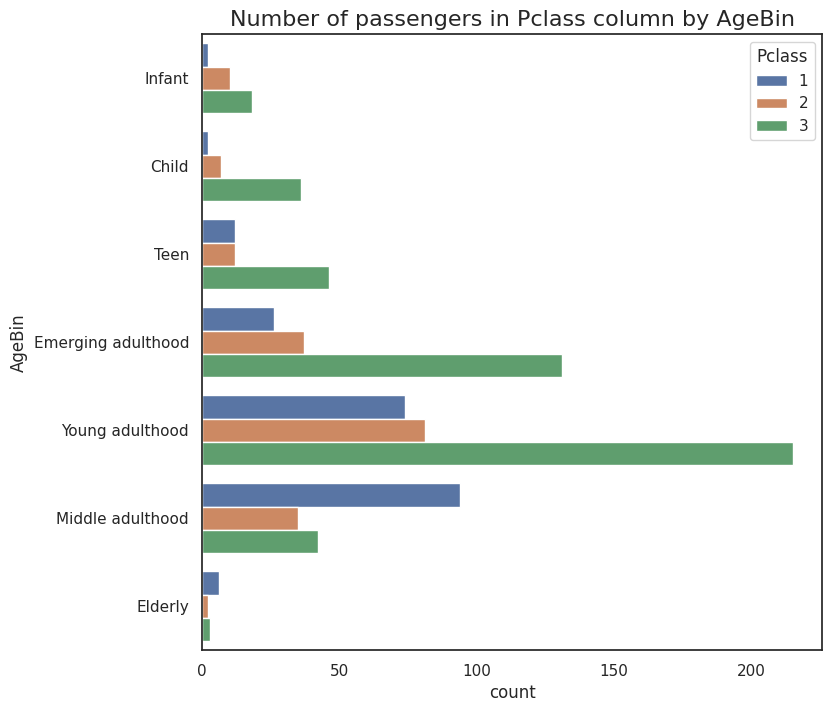

In [39]:
# set plot size
fig= plt.figure(figsize= (8, 8))

# plot Number of passengers in Pclass column by AgeBin.
sns.countplot(data= train_df, y= "AgeBin", hue="Pclass", orient= "h")

# Set charts title
plt.title("Number of passengers in Pclass column by AgeBin", fontdict= {'fontsize': 16})

# Show plot
plt.show()

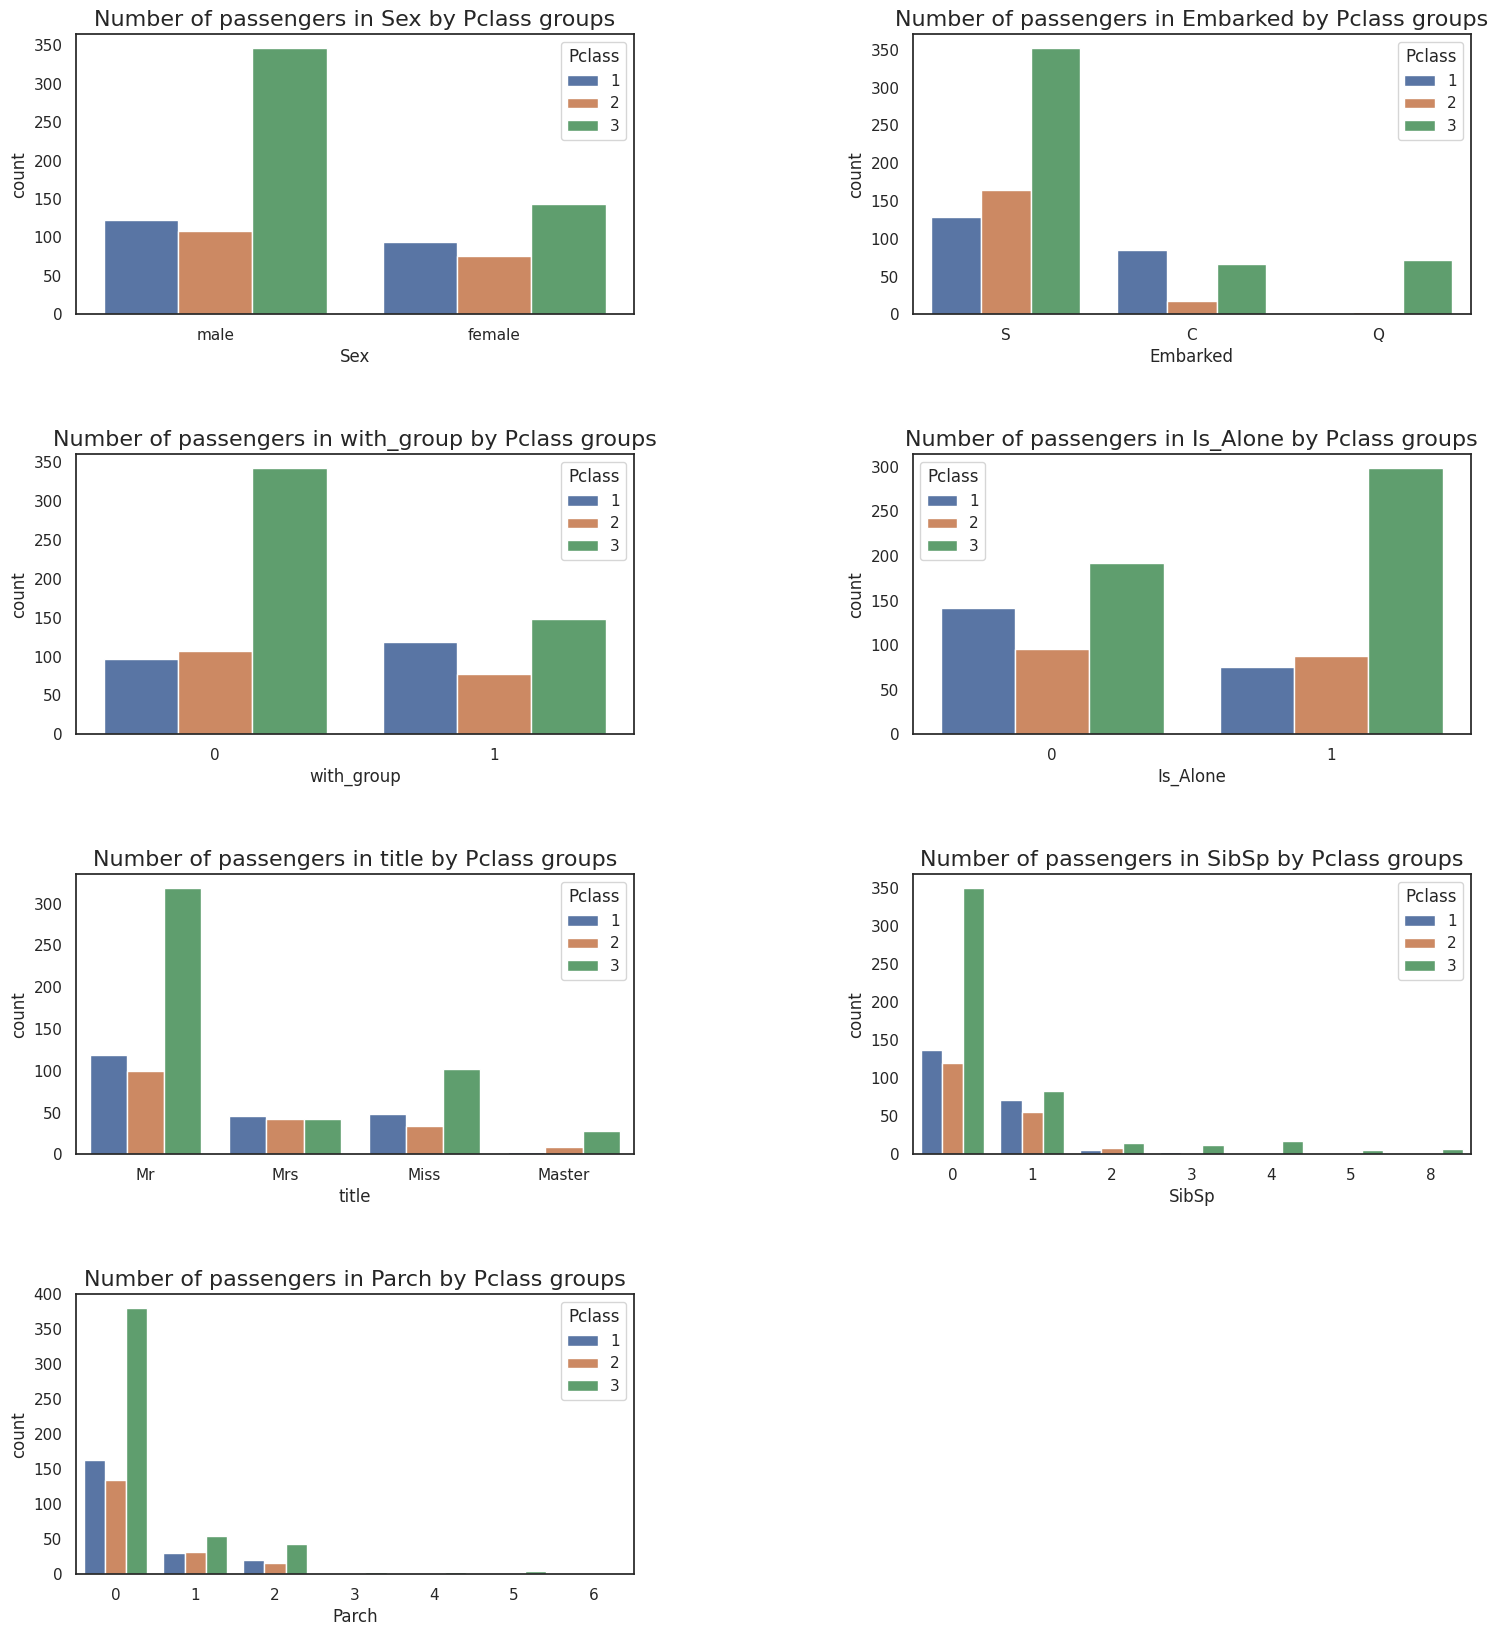

In [40]:
# columns list for looping
cols= ["Sex", "Embarked", 'with_group', 'Is_Alone', "title", "SibSp", "Parch"]

# set plot size
fig= plt.figure(figsize= (18, 20))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Plot Number of passengers in Pclass column by column groups
for i, col in enumerate(cols, 1):
    plt.subplot(4, 2, i)
    # plot Number of passengers.
    sns.countplot(data= train_df, x= col, hue="Pclass")
    
    # Set charts title
    plt.title(f"Number of passengers in {col} by Pclass groups", fontdict= {'fontsize': 16})
    
# Show plot
plt.show()

* **Sex plots**

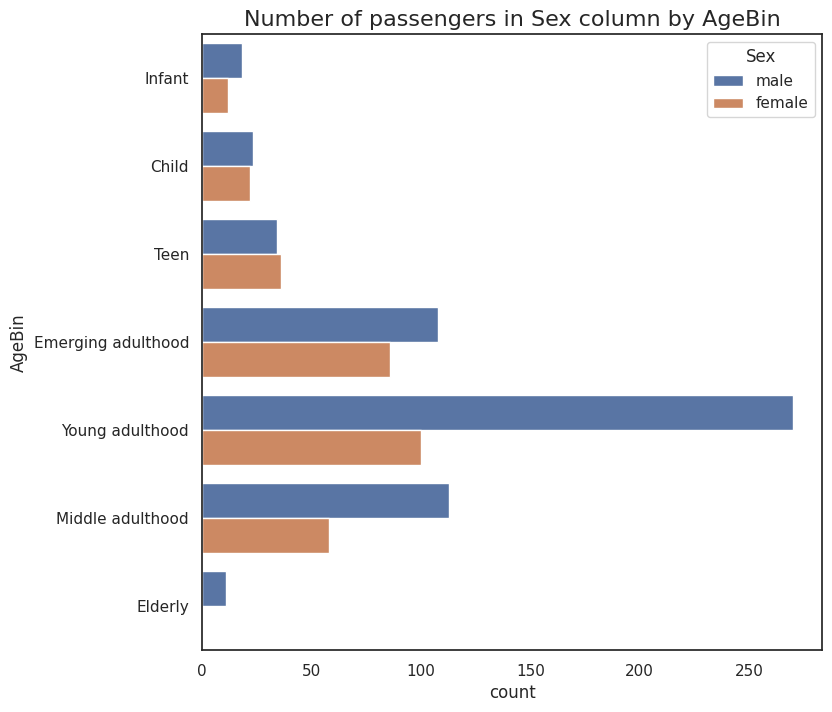

In [41]:
# set plot size
fig= plt.figure(figsize= (8, 8))

# plot Number of passengers in Pclass column by AgeBin.
g= sns.countplot(data= train_df, y= "AgeBin", hue="Sex", orient= "h")

# Set charts title
plt.title("Number of passengers in Sex column by AgeBin", fontdict= {'fontsize': 16})

# Show plot
plt.show()

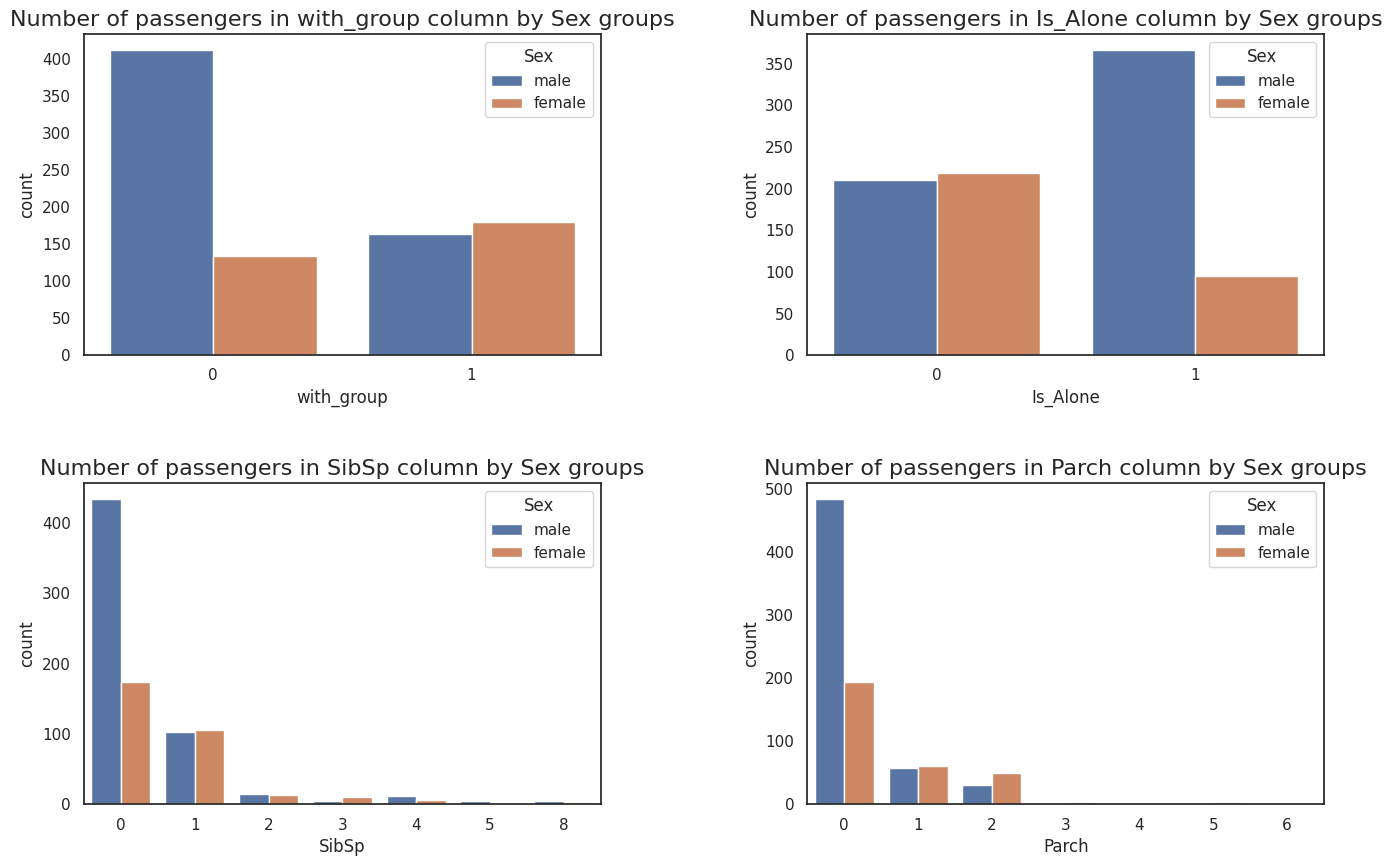

In [42]:
# columns list for looping
cols= ['with_group', 'Is_Alone', 'SibSp', 'Parch']

# Rows Number in subplot 
rows_num= int(np.round((len(cols)/ 2),0))

# set plot size
fig= plt.figure(figsize= (16, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Plot Number of passengers in Pclass column by column groups
for i, col in enumerate(cols, 1):
    plt.subplot(rows_num, 2, i)
    
    # plot Number of passengers.
    sns.countplot(data= train_df, x= col, hue="Sex")
    
    # Set charts title
    plt.title(f"Number of passengers in {col} column by Sex groups", fontdict= {'fontsize': 16})
    
# Show plot
plt.show()

* **Embarked plots**

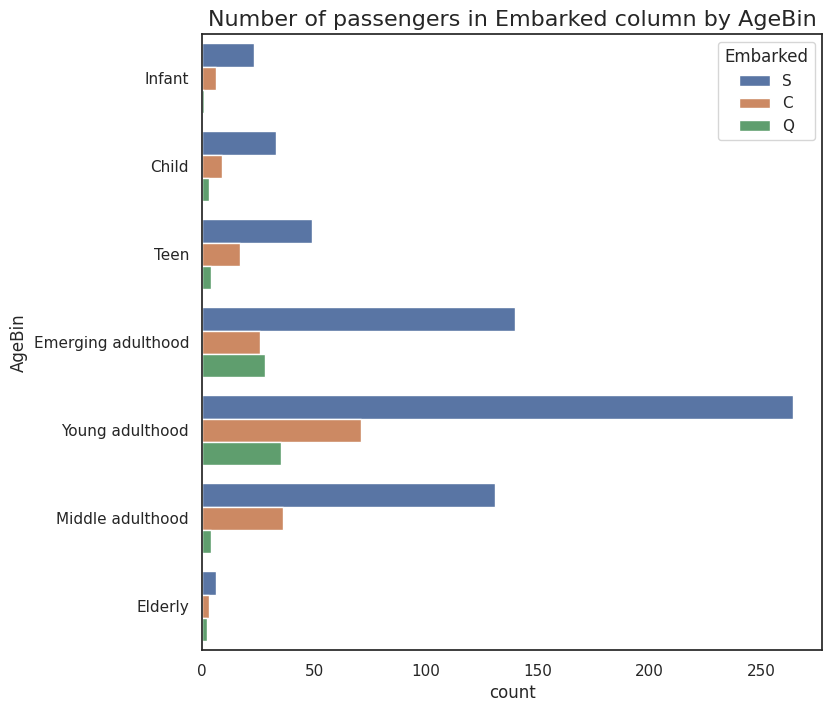

In [43]:
# set plot size
fig= plt.figure(figsize= (8, 8))

# plot Number of passengers in Embarked column by AgeBin.
g= sns.countplot(data= train_df, y= "AgeBin", hue="Embarked", orient= "h")

# Set charts title
plt.title("Number of passengers in Embarked column by AgeBin", fontdict= {'fontsize': 16})

# Show plot
plt.show()

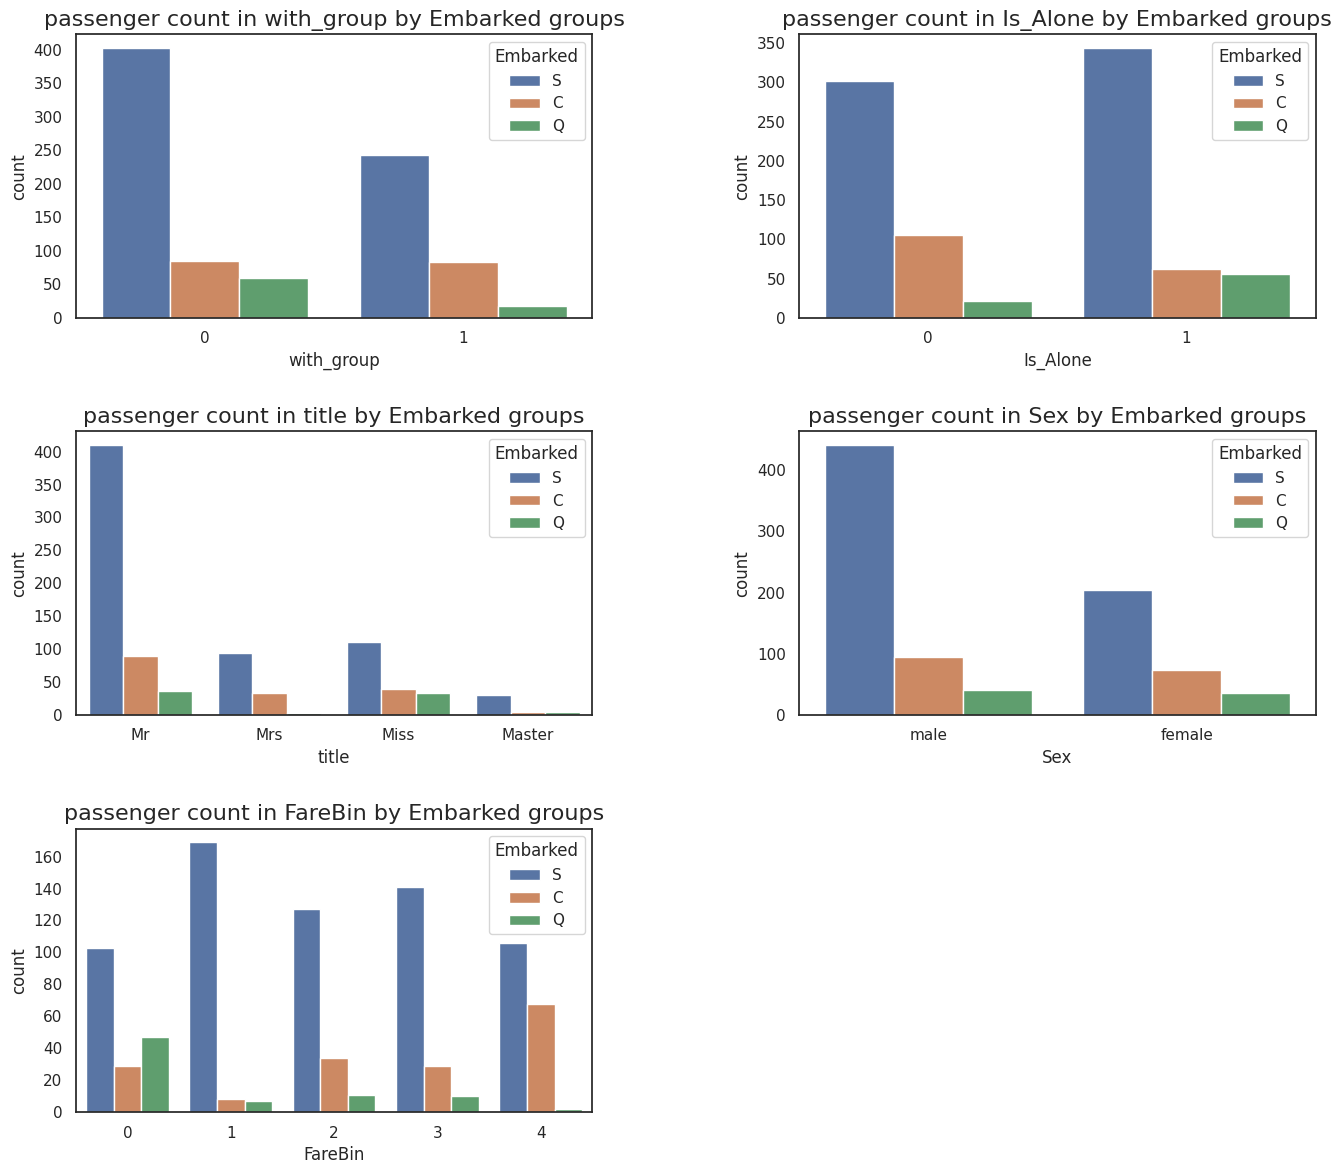

In [44]:
# columns list for looping
cols= ['with_group', 'Is_Alone', 'title', 'Sex', 'FareBin']

# set plot size
fig= plt.figure(figsize= (16, 14))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Plot Number of passengers in column by Embarked groups
for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    # plot Number of passengers.
    sns.countplot(data= train_df, x= col, hue="Embarked")
    
    # Set charts title
    plt.title(f"passenger count in {col} by Embarked groups", fontdict= {'fontsize': 16})
    
# Show plot
plt.show()

* **Fare plots**

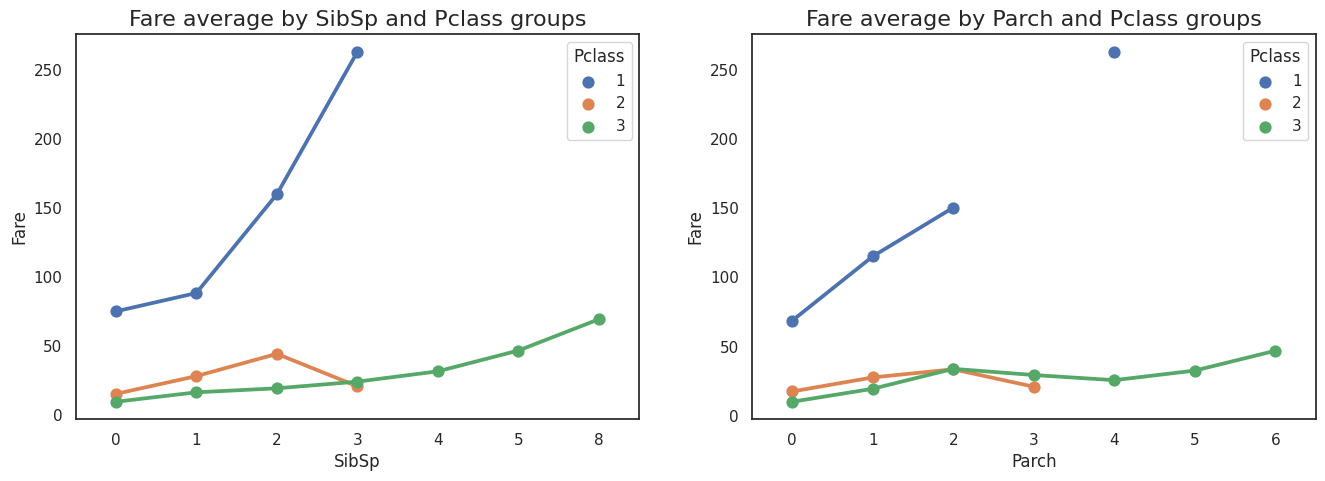

In [45]:
# columns list for looping
cols= ["SibSp", "Parch"]

# set plot size
fig= plt.figure(figsize= (16, 5))

# plot survived count by Pclass and columns groups.
for i, col in enumerate(cols, 1):
    plt.subplot(1, 2, i)
    g= sns.pointplot(data= train_df, y= "Fare" ,x= col, hue= "Pclass", ci= None)

    # Set charts title
    plt.title(f"Fare average by {col} and Pclass groups", fontdict= {'fontsize': 16})

# Show plot
plt.show()

* **Explore relationship between the target feature and columns**

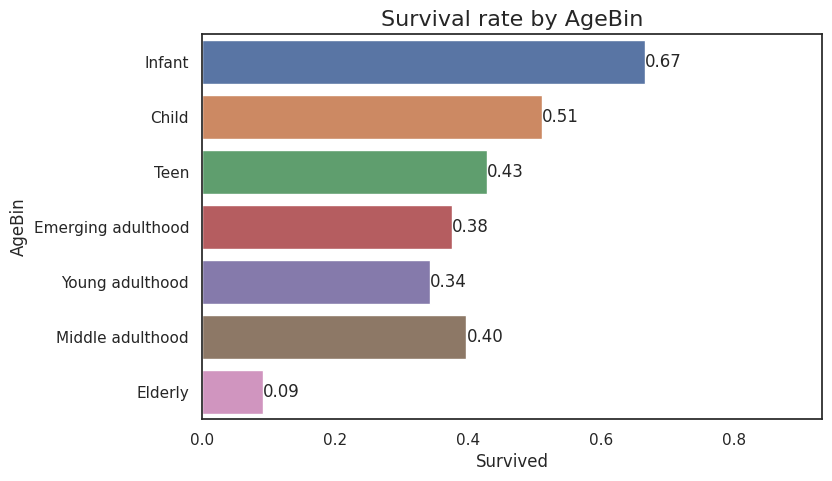

In [46]:
# set plot size
fig= plt.figure(figsize= (8, 5))

# plot survival rate by AgeBin.
g= sns.barplot(data= train_df, y= "AgeBin", x="Survived", ci= None, orient= "h")

# Set charts title
plt.title("Survival rate by AgeBin", fontdict= {'fontsize': 16})

# Show bar lables
for c in g.containers:
    g.bar_label(c, fmt= "%0.2f")
    g.margins(x= 0.4)

# Show plot
plt.show()

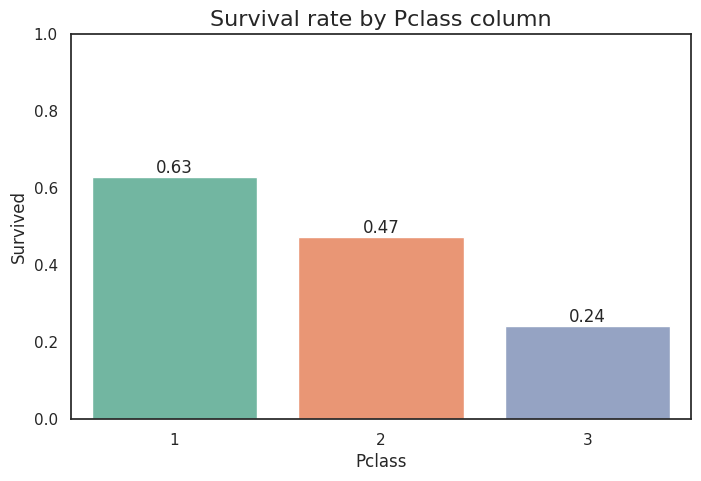

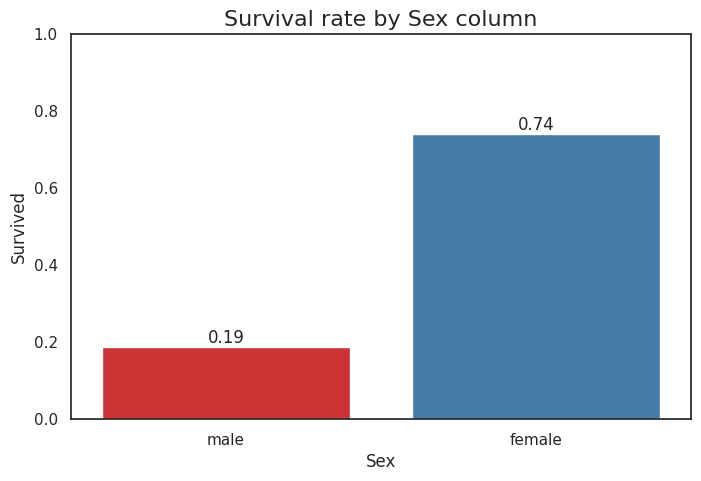

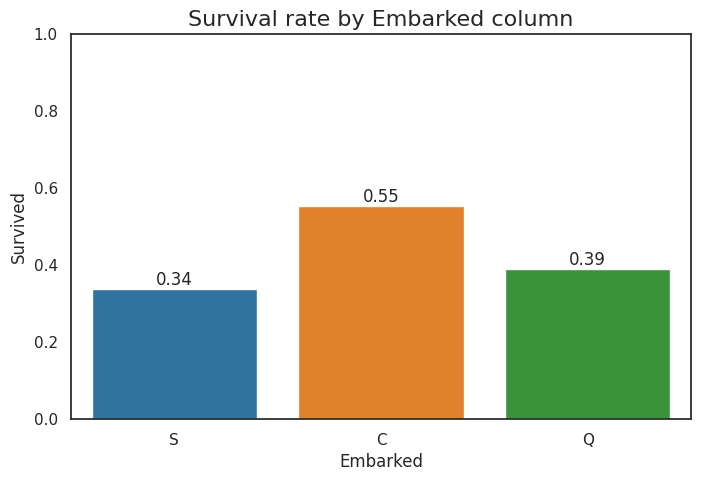

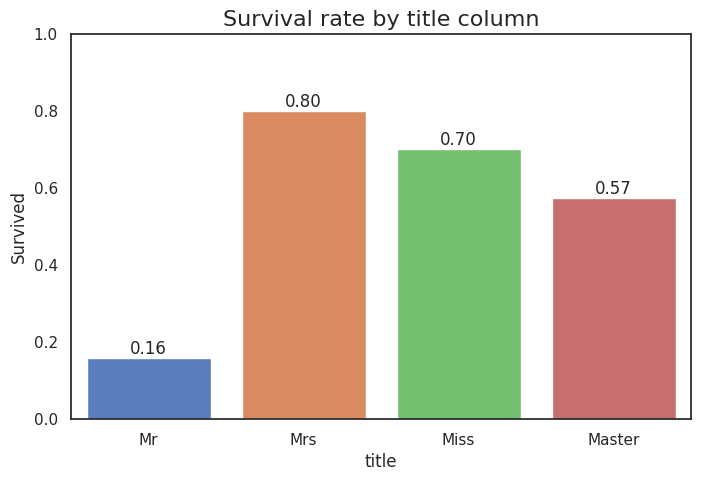

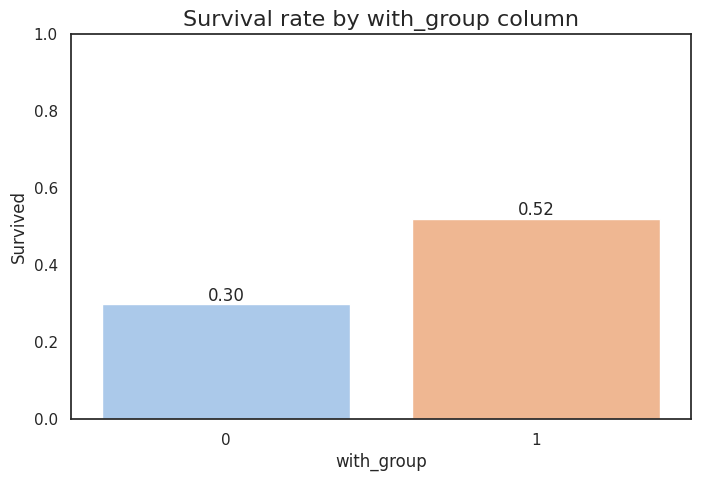

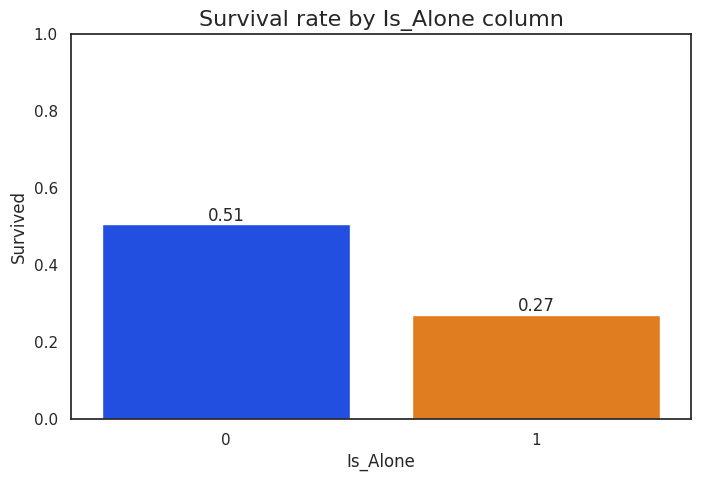

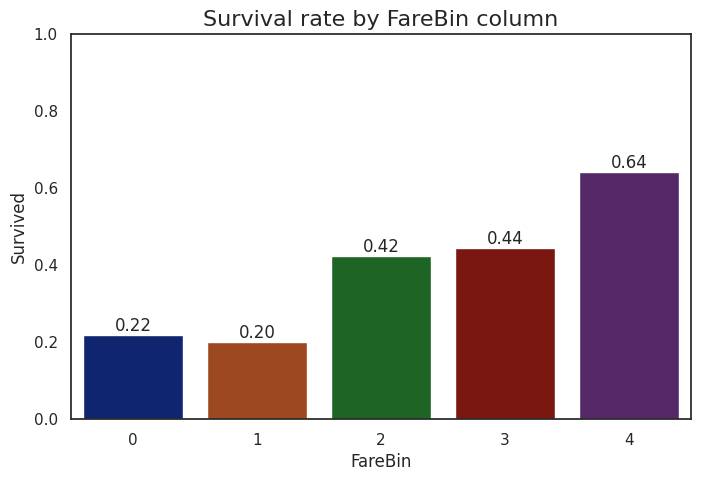

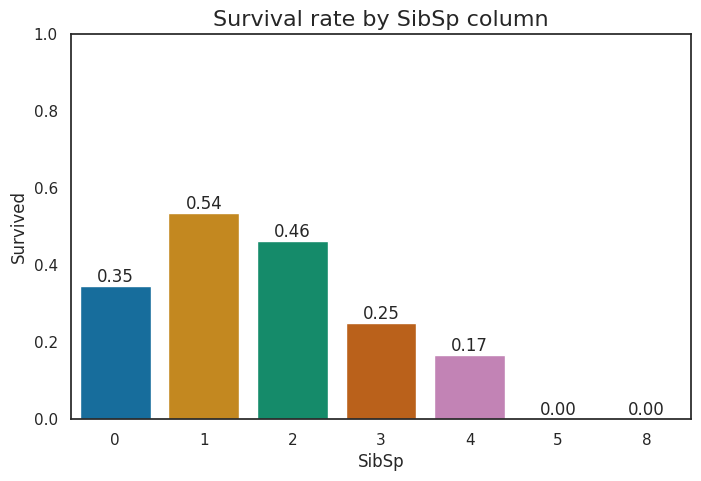

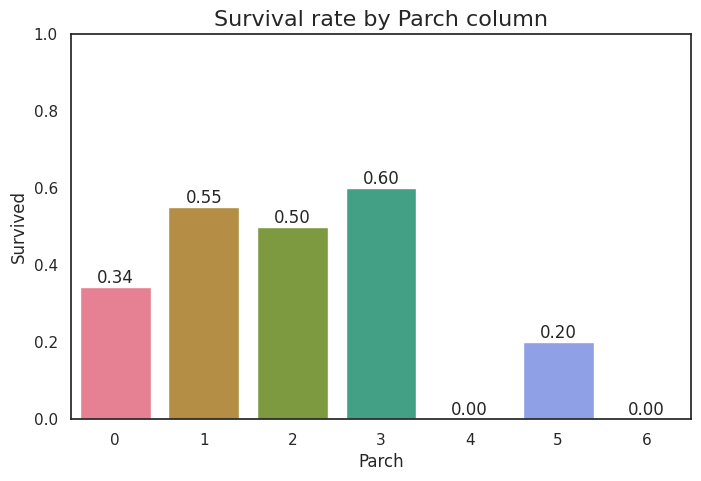

In [47]:
# columns list for looping
cols= ['Pclass', 'Sex', 'Embarked', 'title', 'with_group','Is_Alone', 'FareBin', 'SibSp', 'Parch']

# Rows Number in subplot 
rows_num= int(np.round((len(cols)/ 2),0))

# create palettes list
palettes= ["Set2", "Set1", "tab10", "muted", "pastel", "bright", "dark", "colorblind", "husl"]

# Set palette index to use different palettes in each plot 
k=0

# Plot Survival rate by columns
for col in cols:
    # set plot size
    fig= plt.figure(figsize= (8, 5))
    
    # plot survival rate by col.
    g= sns.barplot(data= train_df, x= col, y="Survived", ci= None, palette= palettes[k])
    
    # change y-axis range
    g.set_ylim(0, 1)

    # Set charts title
    plt.title(f"Survival rate by {col} column", fontdict= {'fontsize': 16})

    # Show bar lables
    for c in g.containers:
        g.bar_label(c, fmt= "%0.2f")
        g.margins(y= 0.4)
    k +=1
    
    # Show plot
    plt.show()
    
    # Create space margins between charts to improve readability.
    print("\n"*3)

### 2.6.3 Identifying patterns and relationships in data

**Sex Plots**

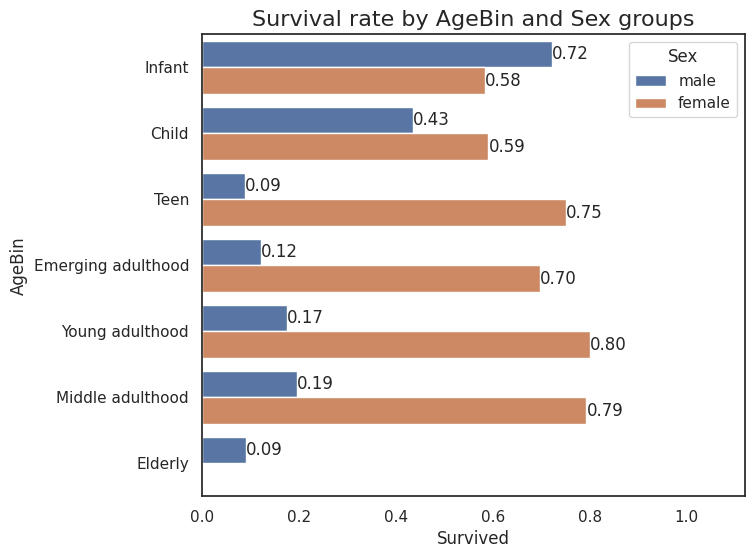

In [48]:
# set plot size
fig= plt.figure(figsize= (7, 6))

# plot survival rate by Age and Sex groups.
g= sns.barplot(data= train_df, y= "AgeBin", x="Survived" ,hue= "Sex", ci= None, orient= "h")

# Set charts title
plt.title(f"Survival rate by AgeBin and Sex groups", fontdict= {'fontsize': 16})

# Show bar lables
for c in g.containers:
    g.bar_label(c, fmt= "%0.2f")
    g.margins(x= 0.4)

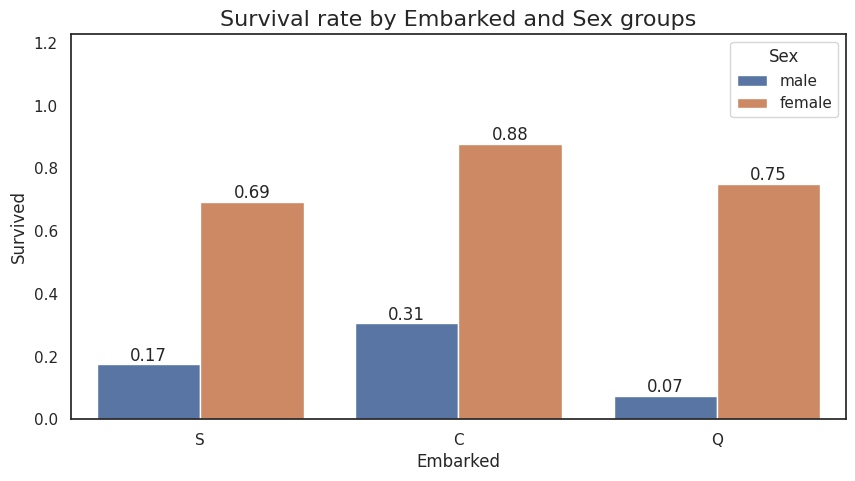

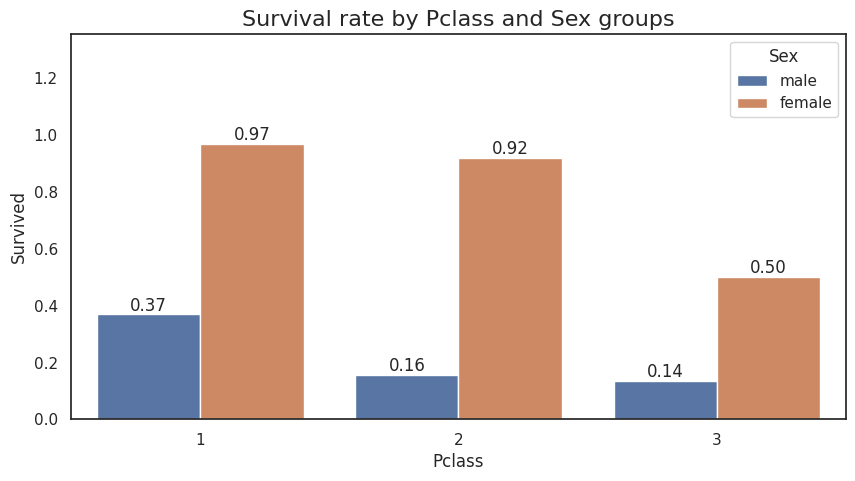

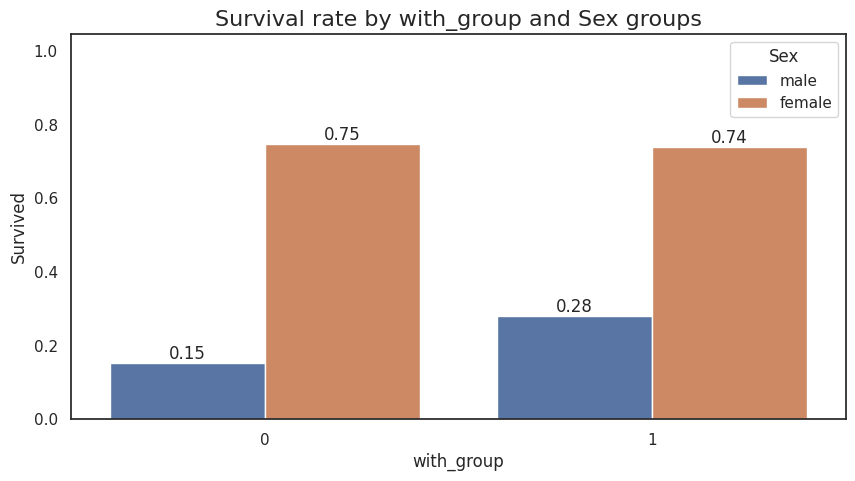

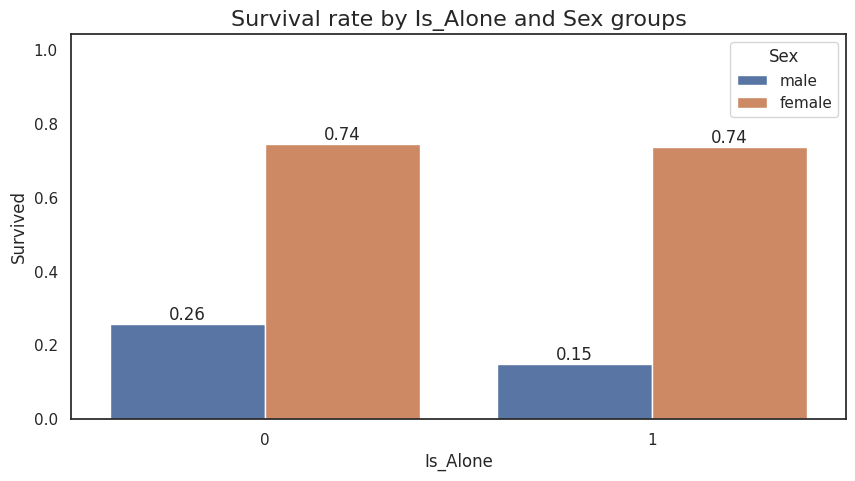

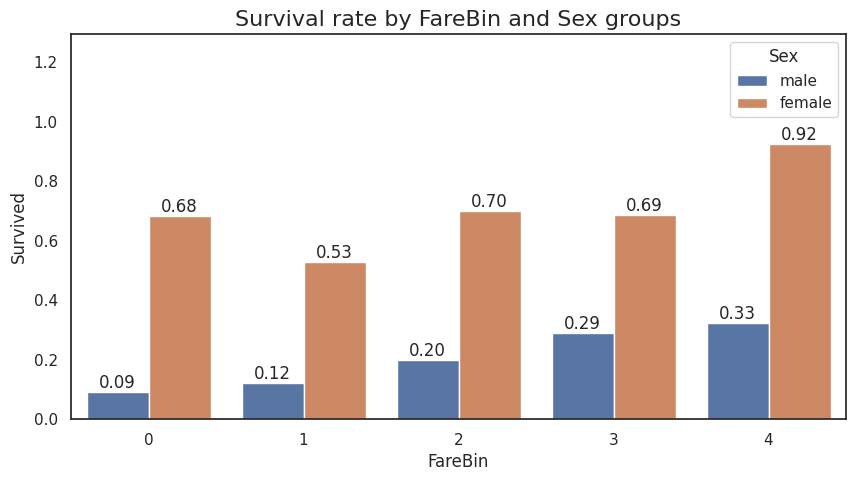

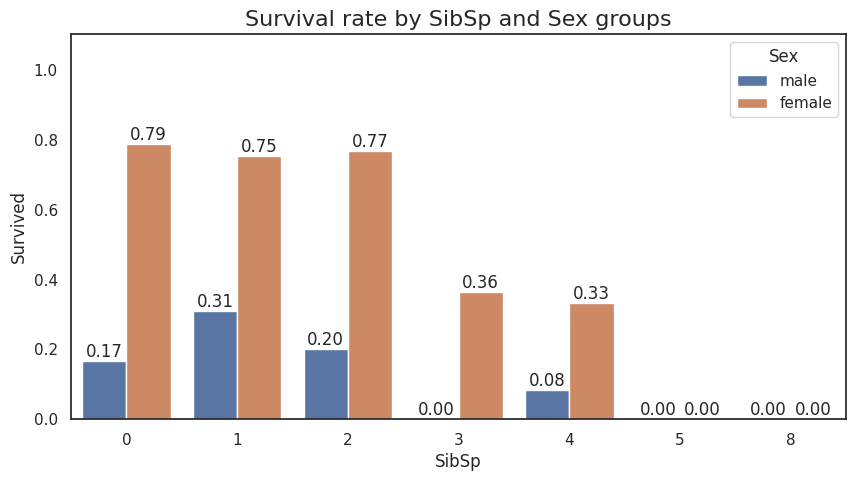

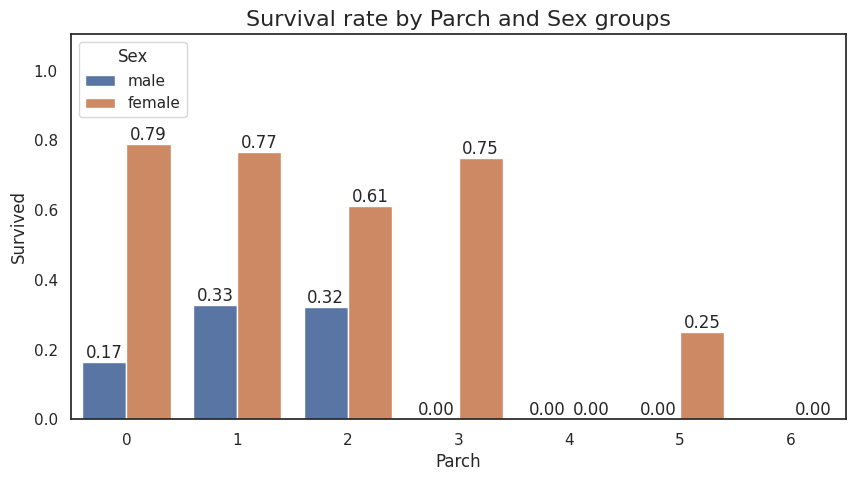

In [49]:
# columns list for looping
cols= ["Embarked", "Pclass", 'with_group', 'Is_Alone', "FareBin", "SibSp", "Parch"]

# Plot Survival rate by columns and Sex
for col in cols:   
    # set plot size
    fig= plt.figure(figsize= (10, 5))
    # plot survival rate by Age and Sex groups.
    g= sns.barplot(data= train_df, x= col, y="Survived" ,hue= "Sex", ci= None)
 
    # Set charts title
    plt.title(f"Survival rate by {col} and Sex groups", fontdict= {'fontsize': 16})

    # Show bar lables
    for c in g.containers:
        g.bar_label(c, fmt= "%0.2f")
        g.margins(y= 0.4)
    # Show plot
    plt.show()
    
    # Create space margins between charts to improve readability.
    print("\n"*3)

**Pclass plots**

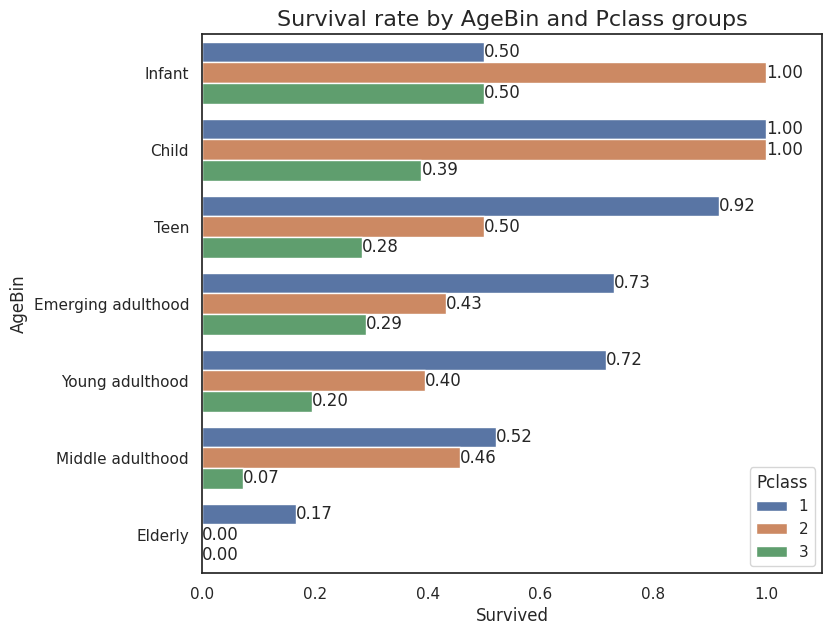

In [50]:
# set plot size
fig= plt.figure(figsize= (8, 7))

# plot survival rate by Age and Sex groups.
g= sns.barplot(data= train_df, y= "AgeBin", x="Survived" ,hue= "Pclass", ci= None, orient= "h")

# Set charts title
plt.title(f"Survival rate by AgeBin and Pclass groups", fontdict= {'fontsize': 16})

# Show bar lables
for c in g.containers:
    g.bar_label(c, fmt= "%0.2f")
    g.margins(x= 0.1)

plt.show()

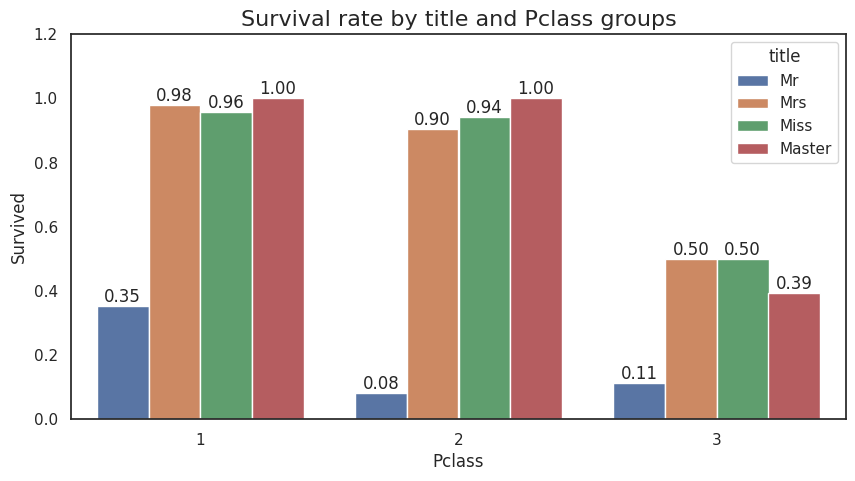

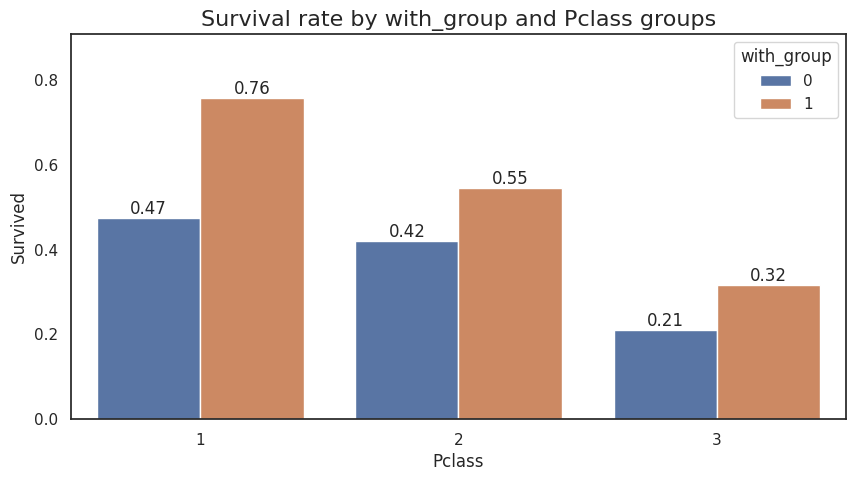

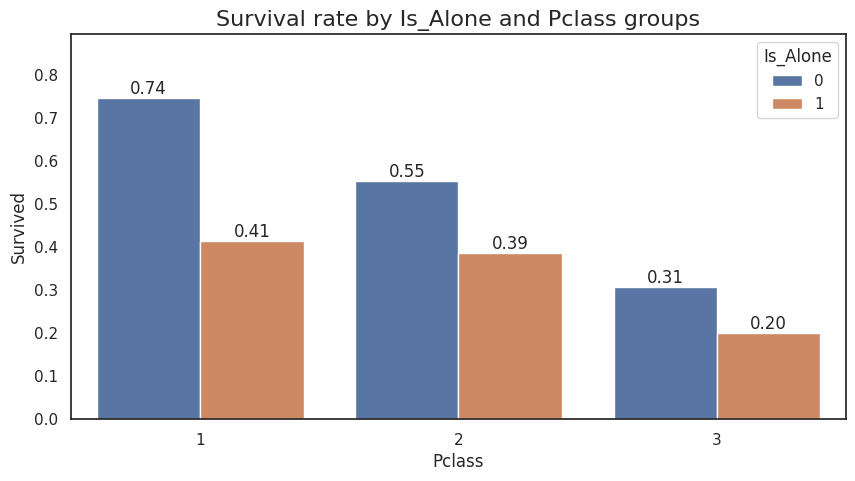

In [51]:
# columns list for looping
cols= ["title", 'with_group', 'Is_Alone']

# Plot Survival rate by columns and Pclass
for col in cols:
    # set plot size
    fig= plt.figure(figsize= (10, 5))
    
    # plot survival rate by Age and Pclass groups.
    g= sns.barplot(data= train_df, hue= col, y="Survived" ,x= "Pclass", ci= None)
    
    # Set charts title
    plt.title(f"Survival rate by {col} and Pclass groups", fontdict= {'fontsize': 16})

    # Show bar lables
    for c in g.containers:
        # add labels
        g.bar_label(c, fmt= "%0.2f")
        g.margins(y= 0.2)

    # Show plot
    plt.show()
    
    # Create space margins between charts to improve readability.
    print("\n"*3)

<Figure size 1000x500 with 0 Axes>

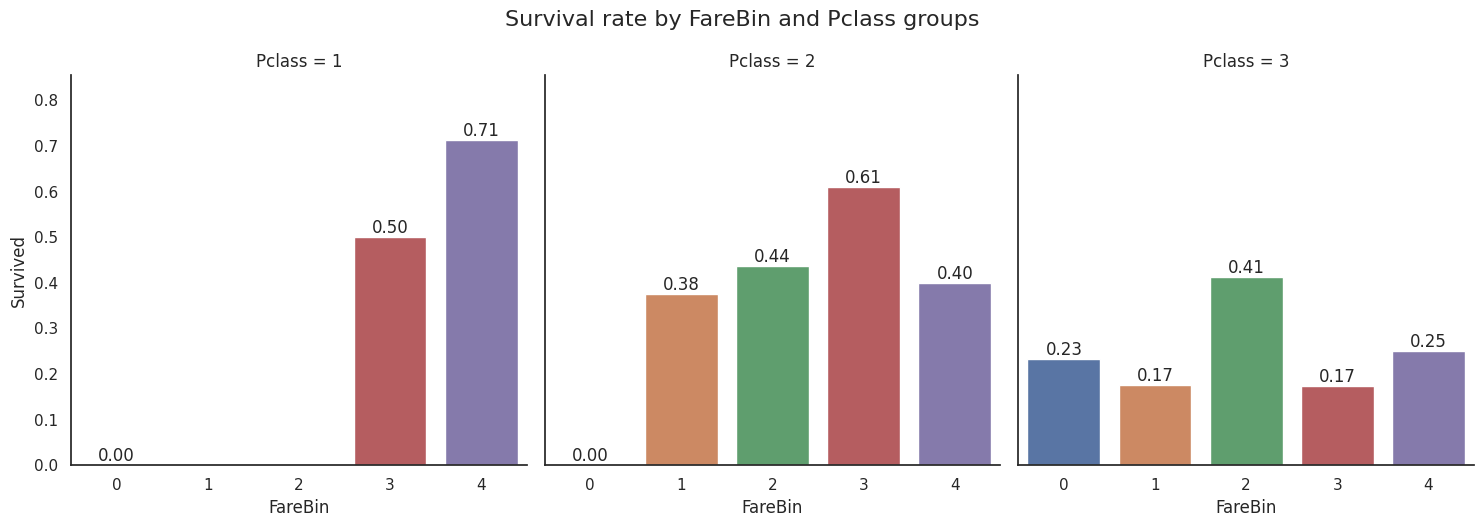

<Figure size 1000x500 with 0 Axes>

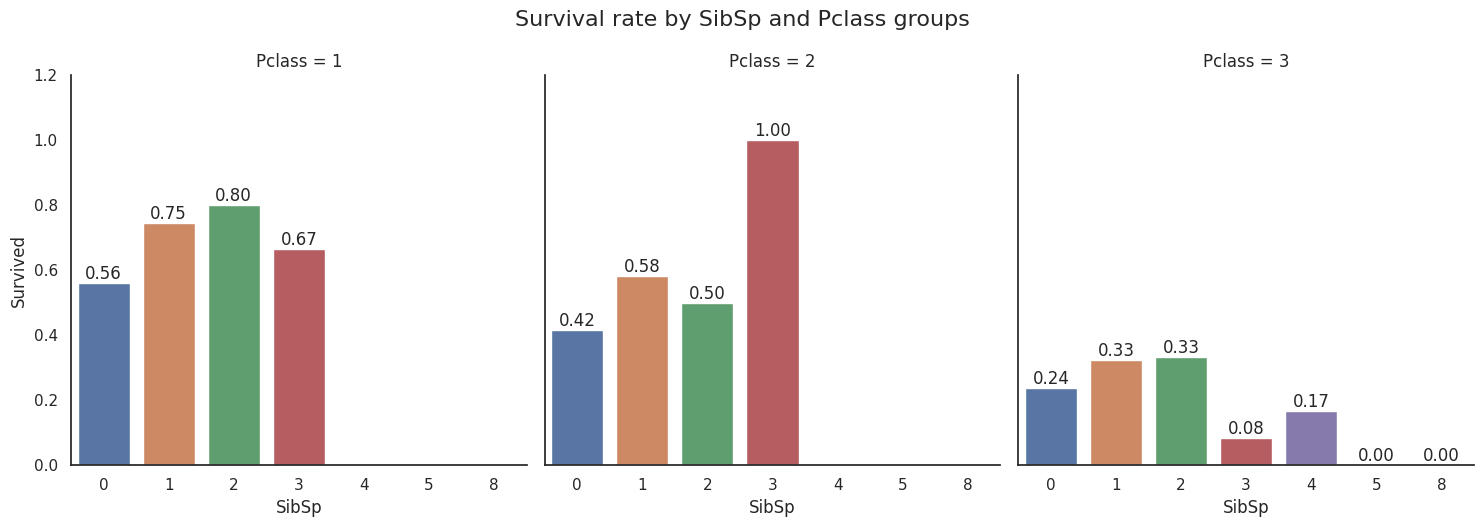

<Figure size 1000x500 with 0 Axes>

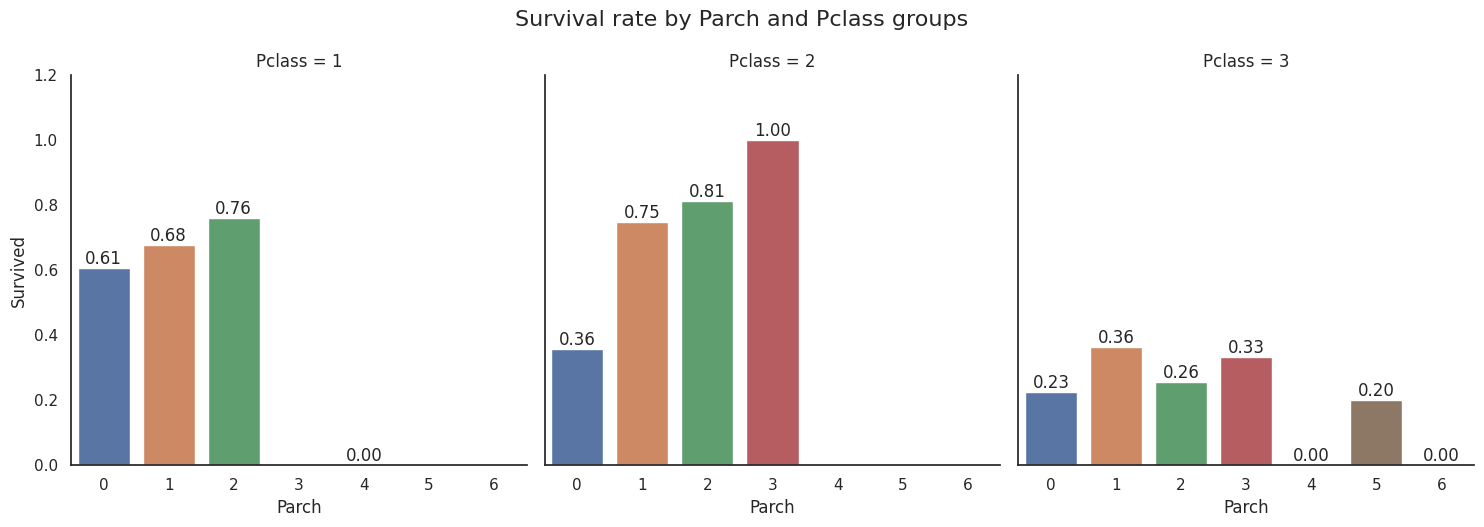

In [52]:
# columns list for looping
cols= ["FareBin", "SibSp", "Parch"]

# Plot Survival rate by columns and Pclass
for col in cols:
    # set plot size
    fig= plt.figure(figsize= (10, 5))
    
    # plot survival rate by Age and Pclass groups.
    g= sns.catplot(data= train_df, x= col, y="Survived" ,col= "Pclass",kind= "bar", ci= None)
    
    # Set charts title
    g.fig.suptitle(f"Survival rate by {col} and Pclass groups", y=1.05, size= 16)

    # Show bar lables
    for ax in g.axes.flat:
        for c in ax.containers:
            # add labels
            ax.bar_label(c, fmt= "%0.2f")
            ax.margins(y= 0.2)

    # Show plot
    plt.show()
    
    # Create space margins between charts to improve readability.
    print("\n"*3)

* **Survival rate by Sex and Pclass**

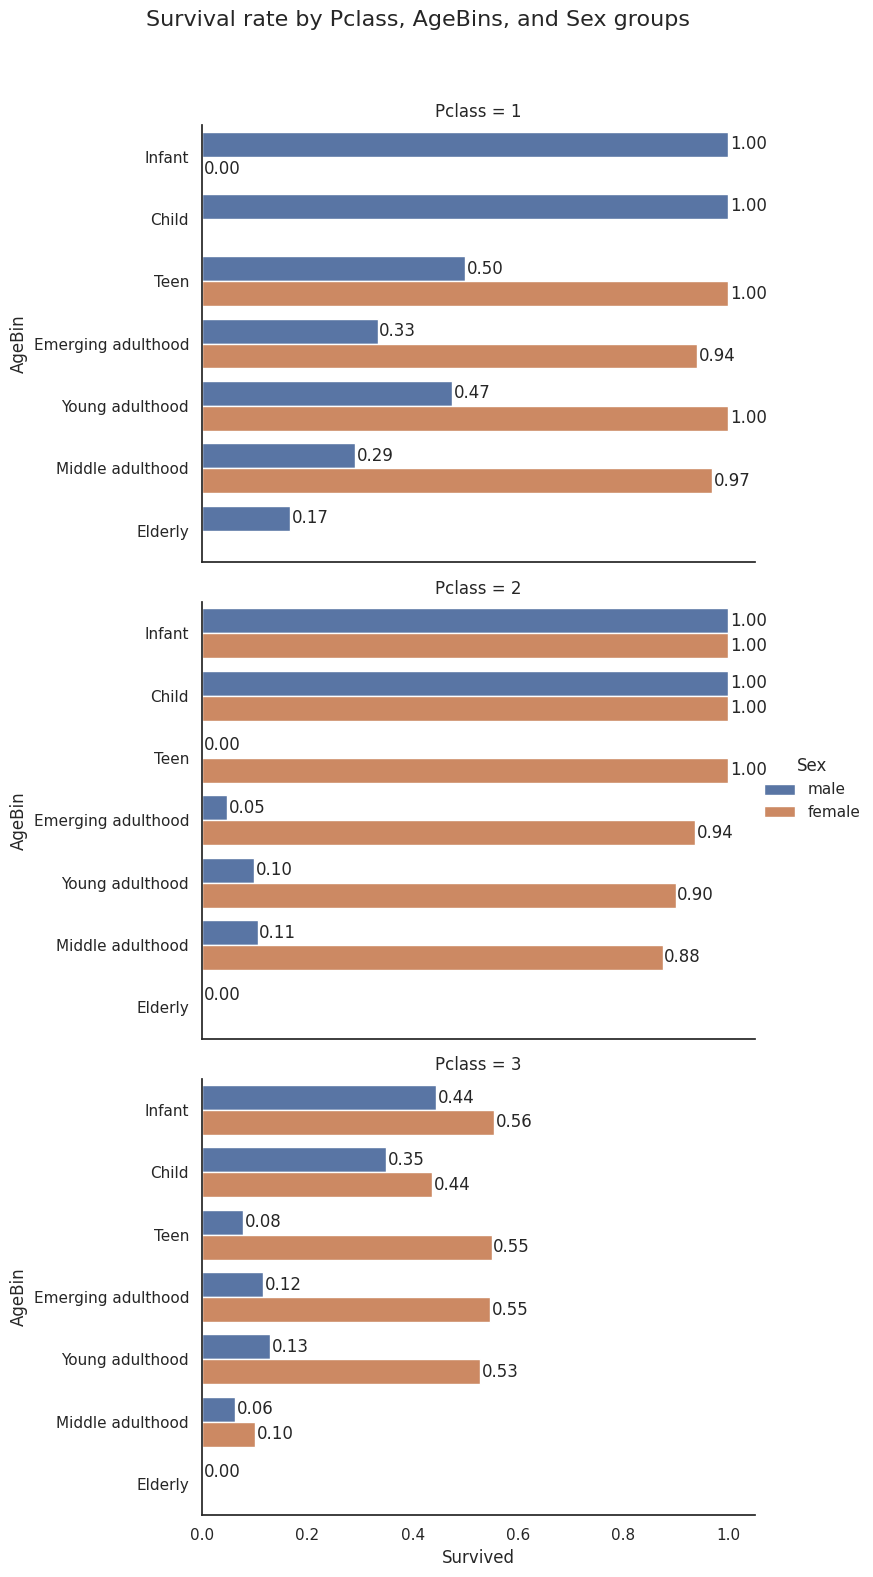

In [53]:
# plot survived rate by Pclass, AgeBin, and Sex groups.
g= sns.catplot(data= train_df,y= "AgeBin",x="Survived" ,hue= "Sex", row= "Pclass", kind= "bar", aspect= 1.6, ci= None)

# Set charts title
g.fig.suptitle("Survival rate by Pclass, AgeBins, and Sex groups", y= 1.05, size= 16)

# show bar labels on each ax
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, fmt= "%0.2f", padding= 1.2)

# Show plot
plt.show()

<Figure size 1000x500 with 0 Axes>

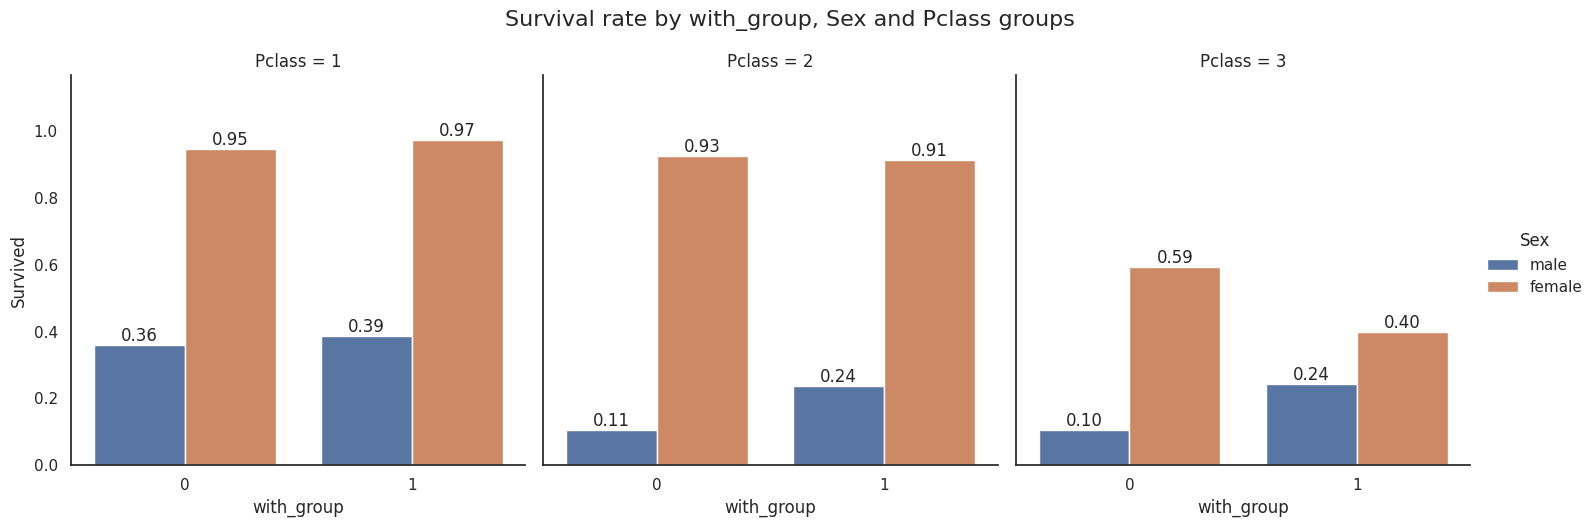

<Figure size 1000x500 with 0 Axes>

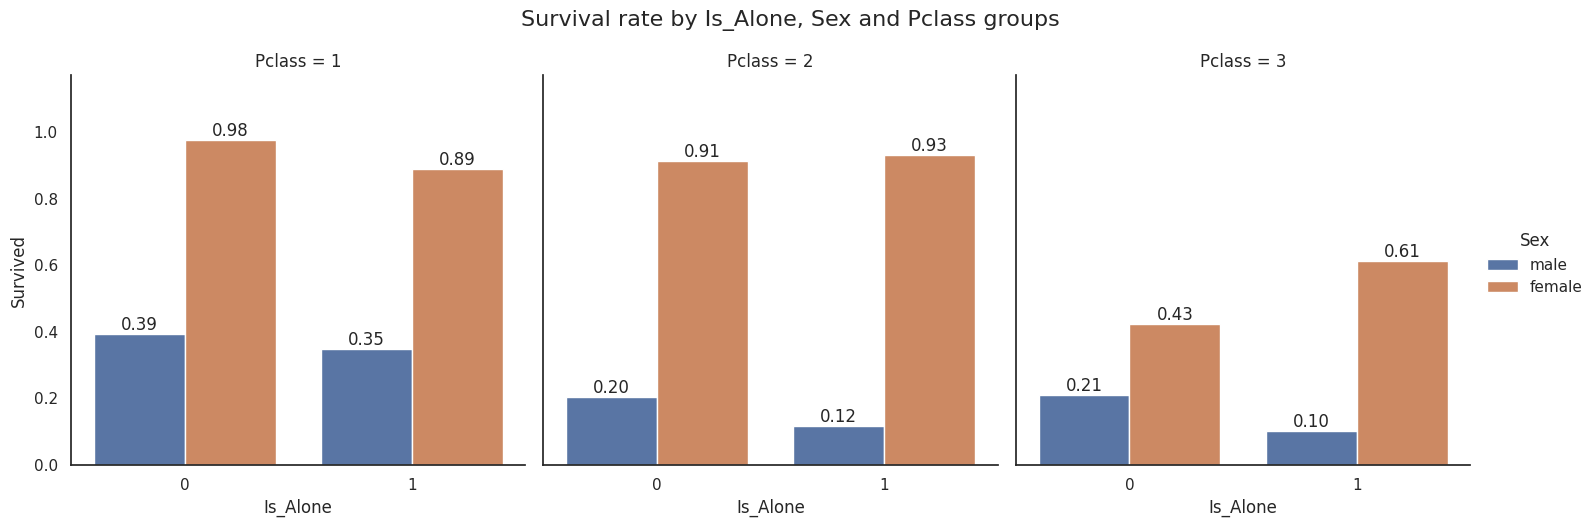

<Figure size 1000x500 with 0 Axes>

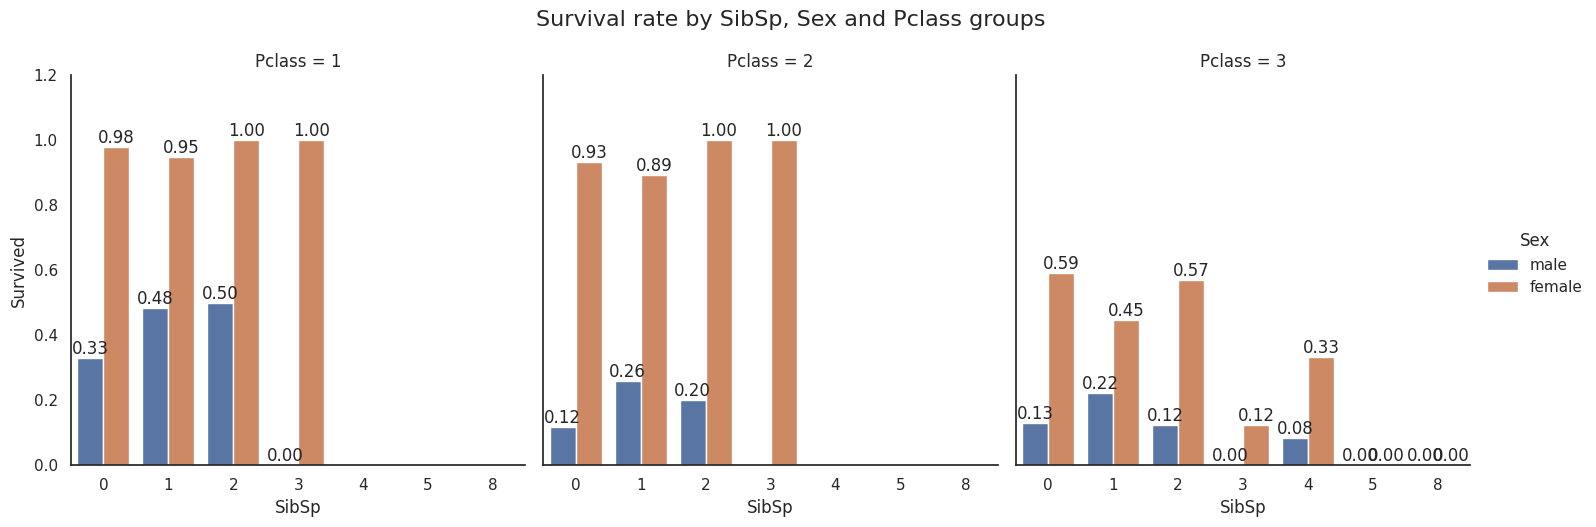

<Figure size 1000x500 with 0 Axes>

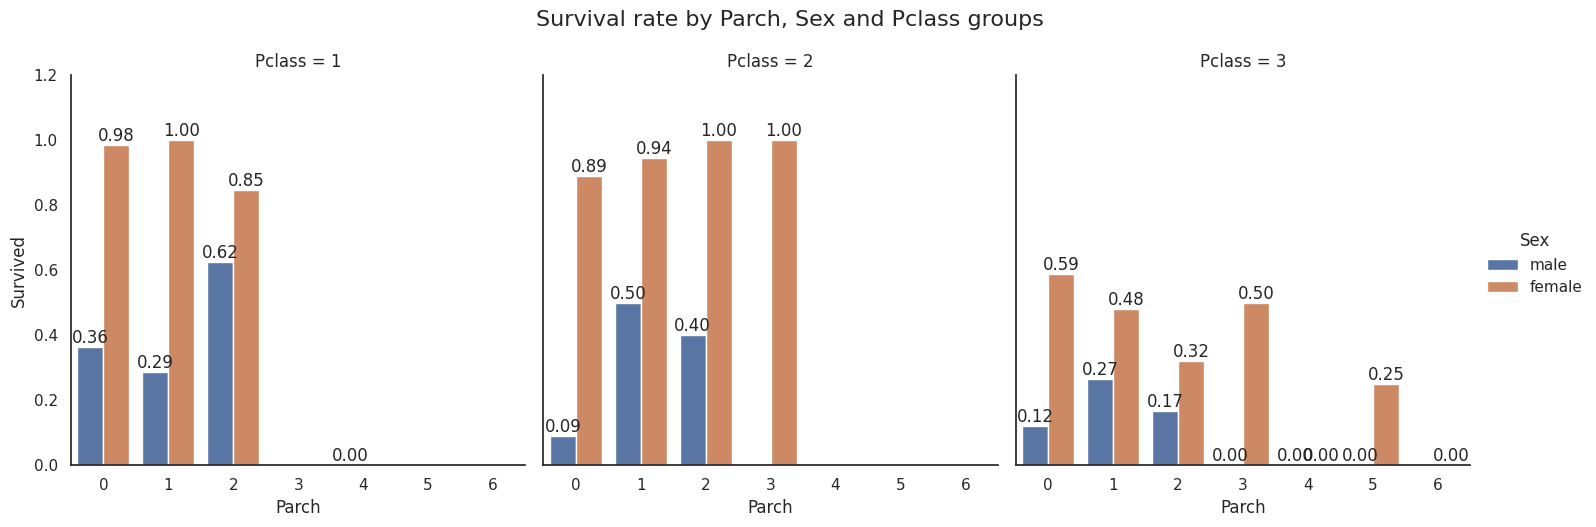

In [54]:
# columns list for looping
cols= ["with_group", 'Is_Alone', "SibSp", "Parch"]

# Plot Survival rate by columns and Sex and Pclass
for col in cols:
    # set plot size
    fig= plt.figure(figsize= (10, 5))
    
    # plot survival rate by Age and Pclass groups.
    g= sns.catplot(data= train_df, x= col, y="Survived", hue= "Sex" ,col= "Pclass",kind= "bar", ci= None)
    
    # Set charts title
    g.fig.suptitle(f"Survival rate by {col}, Sex and Pclass groups", y=1.05, size= 16)

    # Show bar lables
    for ax in g.axes.flat:
        for c in ax.containers:
            # add labels
            ax.bar_label(c, fmt= "%0.2f")
            ax.margins(y= 0.2)

    # Show plot
    plt.show()
    
    # Create space margins between charts to improve readability.
    print("\n"*3)

# **Conclusion**

The Titanic disaster was a tragedy that claimed the lives of over 1,500 people. However, the survival rates on the Titanic were not evenly distributed. Females had a higher survival rate than males, regardless of class. Passengers in first and second class had a higher survival rate than those in third class, regardless of gender. The highest survival rate was among females in first class, at 80%. The lowest survival rate was among males in third class, at 16%.

  - These findings suggest that the following factors were associated with a higher survival rate on the Titanic:
    - Being female.
    - Being in first or second class.
    - Being a child or teenager.

* If you are interested, Explore all the insights I found about the Titanic disaster **[here](https://drive.google.com/file/d/1TzgMSa8zxdCXe5jC_MvVc-fVZdxMRG9w/view?usp=sharing)**.

## **Feature Enginerring**
    we will drop the redandunt columns and chandge column types to numeric to fit with models. 

In [55]:
# Convert Sex column to numeric type
for df in combine:
    df["Sex"]= df["Sex"].apply(lambda x: 1 if x=="male" else 0)  

In [56]:
# Verify Column names before dropping
# print("train_df columns before: \n", train_df.columns)

# Store test_df PassengerId cloumn
test_passengerIds= test_df["PassengerId"]

# Drop redundant columns
for df in combine:
    df.drop(['PassengerId', 'Name', 'Age','Ticket', 'Fare', 'Cabin'], axis=1, inplace= True)
    
    # Verify column names after dropping.
    print(f"{df.name} columns after dropping: \n", df.columns, "\n")

Training set columns after dropping: 
 Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'title',
       'with_group', 'Is_Alone', 'AgeBin', 'FareBin'],
      dtype='object') 

Test set columns after dropping: 
 Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'title', 'with_group',
       'Is_Alone', 'AgeBin', 'FareBin'],
      dtype='object') 



In [57]:
# dummies non-numeric columns
train_df= pd.get_dummies(data= train_df, columns= ["Pclass", "Embarked", 'title', 'AgeBin', 'FareBin'], drop_first= True)

test_df= pd.get_dummies(data= test_df, columns= ["Pclass", "Embarked", 'title', 'AgeBin', 'FareBin'], drop_first= True)

In [58]:
# Show first rows of train_df 
train_df.head()

,Survived,Sex,SibSp,Parch,with_group,Is_Alone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,...,AgeBin_Child,AgeBin_Teen,AgeBin_Emerging adulthood,AgeBin_Young adulthood,AgeBin_Middle adulthood,AgeBin_Elderly,FareBin_1,FareBin_2,FareBin_3,FareBin_4
0,0,1,1,0,0,0,False,True,False,True,...,False,False,True,False,False,False,False,False,False,False
1,1,0,1,0,0,0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,1,0,0,0,0,1,False,True,False,True,...,False,False,False,True,False,False,True,False,False,False
3,1,0,1,0,1,0,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
4,0,1,0,0,0,1,False,True,False,True,...,False,False,False,True,False,False,True,False,False,False


In [59]:
# Verify features variance before modeling 
train_df.describe()

,Survived,Sex,SibSp,Parch,with_group,Is_Alone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.647587,0.523008,0.381594,0.386083,0.518519
std,0.486592,0.477990,1.102743,0.806057,0.487123,0.499938
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,8.000000,6.000000,1.000000,1.000000


In [60]:
# Show first rows of test_df 
test_df.head()

,Sex,SibSp,Parch,with_group,Is_Alone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,title_Miss,...,AgeBin_Child,AgeBin_Teen,AgeBin_Emerging adulthood,AgeBin_Young adulthood,AgeBin_Middle adulthood,AgeBin_Elderly,FareBin_1,FareBin_2,FareBin_3,FareBin_4
0,1,0,0,0,1,False,True,True,False,False,...,False,False,False,True,False,False,True,False,False,False
1,0,1,0,0,0,False,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,1,0,0,0,1,True,False,True,False,False,...,False,False,False,False,True,False,True,False,False,False
3,1,0,0,0,1,False,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
4,0,1,1,0,0,False,True,False,True,False,...,False,False,True,False,False,False,False,True,False,False


In [61]:
# Verify features variance before modeling 
test_df.describe()

,Sex,SibSp,Parch,with_group,Is_Alone
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.636364,0.447368,0.392344,0.232057,0.555024
std,0.481622,0.896760,0.981429,0.422651,0.497559
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,8.000000,9.000000,1.000000,1.000000


* As we see above, tha dataset features have low variance. So, the data is ready for modeling.

# **Modeling**

* **split the training set to training and test sets.**

In [62]:
# Create a general seed
SEED= 616

# Set X and y data as array
X= train_df.drop("Survived", axis= 1).values
y= train_df["Survived"].values

# Split the training set 
X_train, X_test, y_train, y_test= train_test_split (X, y, test_size= 0.3, stratify= y, random_state= SEED)

- **Finding the Best Classification Model**

In [63]:
# create empty list
results= []

# Create models dict
models= {"KNN": KNeighborsClassifier(), "Logistic Regression": LogisticRegression(), "Decision Tree": DecisionTreeClassifier(),
         "svc": SVC(), "Random Forest": RandomForestClassifier(), "Ada Boost": AdaBoostClassifier(), "gbc": GradientBoostingClassifier()}

# build validation scores for each model
for name, model in models.items():
    kf= KFold(n_splits=6, shuffle= True, random_state= SEED)
    cv_scores= cross_val_score(model, X_train, y_train, cv= kf)
    results.append(cv_scores)
    print(f"{name} val average score: {np.mean(cv_scores)*100 :0.1f} %")

KNN val average score: 78.7 %
Logistic Regression val average score: 79.5 %
Decision Tree val average score: 79.0 %
svc val average score: 81.7 %
Random Forest val average score: 81.2 %
Ada Boost val average score: 78.2 %
gbc val average score: 81.1 %


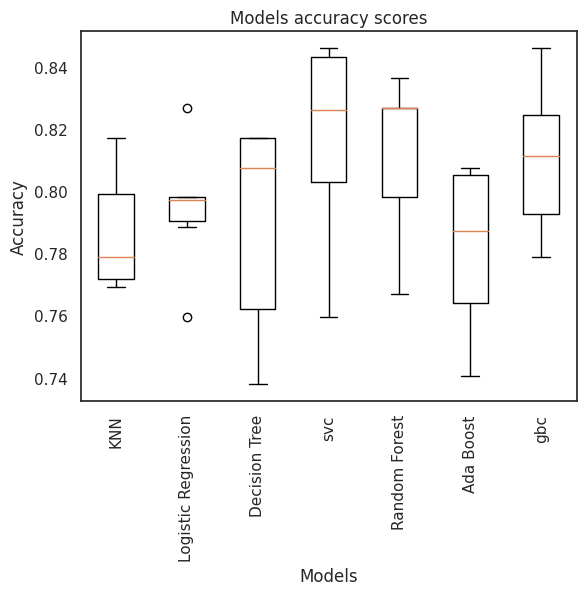

KNN Test set accuracy is: 0.82

Logistic Regression Test set accuracy is: 0.85

Decision Tree Test set accuracy is: 0.81

svc Test set accuracy is: 0.88

Random Forest Test set accuracy is: 0.83

Ada Boost Test set accuracy is: 0.84

gbc Test set accuracy is: 0.85



In [64]:
# Plot models scores 
plt.boxplot(results, labels= models.keys())

# rotate xlabels
plt.xticks(rotation=90)

# Show title, xlabel and ylabel
plt.title ("Models accuracy scores") 
plt.ylabel ("Accuracy")
plt.xlabel ("Models")

# show plot
plt.show()

# Set test performance
for name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)

    # get test performance
    test_model_accuracy= model.score(X_test, y_test)
    print(f"{name} Test set accuracy is: {test_model_accuracy:0.2f}\n")

* As we see in the graph, Super Victor, LogisicRegression, random forest, and gradient boosting classifier models have the highest accuracy scores. We will compare them to choose the best after tunning.

In [65]:
# set KFold algorithm
kf= KFold(n_splits=6, shuffle= True, random_state= SEED)

## Build SVC model
# Set paramaters values
params_svc = {'C': [1, 10, 75, 100, 125, 300], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['linear', 'rbf', 'poly']} 

# build a model
svc= SVC(random_state= SEED)

# Set Grid search
grid_svc= GridSearchCV(estimator= svc, param_grid= params_svc,cv= kf)

# fit model
grid_svc.fit(X_train, y_train)

# Extract best params
best_hyperparams= grid_svc.best_params_

# Extract best score
best_CV_score= grid_svc.best_score_

# Extract best model
svc_model= grid_svc.best_estimator_

# Print best params and score
print("best hyperparams: \n", best_hyperparams)

# Print best params and score
print("best score: \n", best_CV_score)

best hyperparams: 
 {'C': 75, 'gamma': 0.01, 'kernel': 'rbf'}
best score: 
 0.8122199402539209


In [66]:
# ## Build Logistic regression model
# # Set paramaters values
# params_log = {'penalty': ["l1", "l2"], 'C': [0.1, 1, 10, 50, 100], 'solver': ['lbfgs', 'saga']} 

# # build a model
# logreg= LogisticRegression()

# # Set Grid search
# grid_log= GridSearchCV(estimator= logreg, param_grid= params_log,cv= kf)

# # fit model
# grid_log.fit(X_train, y_train)

# # Extract best params
# best_hyperparams= grid_log.best_params_

# # Extract best score
# best_CV_score= grid_log.best_score_

# # Extract best model
# log_model= grid_log.best_estimator_

# # Print best params and score
# print("best hyperparams: \n", best_hyperparams)

# # Print best params and score
# print("best score: \n", best_CV_score)

In [67]:
# ## Build Random Forest model

# # Set paramaters values
# params_rf = {
#               'n_estimators': [300, 400, 500],
#               'max_depth': [4, 6, 8],
#               'min_samples_leaf': [0.1, 0.2],
#               'max_features': ['auto', 1/3, 'log2', 'sqrt']} 

# # build a model
# rf= RandomForestClassifier(random_state= SEED)

# # Set Grid search
# grid_rf= GridSearchCV(estimator= rf, param_grid= params_rf,cv= kf)

# # fit model
# grid_rf.fit(X_train, y_train)

# # Extract best params
# best_hyperparams= grid_rf.best_params_

# # Extract best score
# best_CV_score= grid_rf.best_score_

# # Extract best model
# rf_model= grid_rf.best_estimator_

# # Print best params and score
# print("best hyperparams: \n", best_hyperparams)

# # Print best params and score
# print("best score: \n", best_CV_score)

In [68]:
# ## Build Gradient Boosting model

# # Set paramaters values
# params_gbc = {'n_estimators': [100, 300, 400, 500], 'max_depth': [3, 5, 10],
#     'learning_rate': [0.1, 0.2, 0.1, 0.001], 'loss': ['log_loss', 'deviance', 'exponential']}

# # build a model
# gbc = GradientBoostingClassifier(random_state=SEED)

# # Set Grid search
# grid_gbc = GridSearchCV(estimator=gbc, param_grid=params_gbc, cv=kf)

# # fit model
# grid_gbc.fit(X_train, y_train)

# # Extract best params
# best_hyperparams = grid_gbc.best_params_

# # Extract best score
# best_CV_score = grid_gbc.best_score_

# # Extract best model
# gbc_model = grid_gbc.best_estimator_

# # Print best params and score
# print("best hyperparams: \n", best_hyperparams)

# # Print best params and score
# print("best score: \n", best_CV_score)


In [69]:
# ## Compare between models
# # best models list
# best_models= {"rf": rf_model, "svc": svc_model, "gbc": gbc_model, "logreg": log_model}

# for name, model in best_models.items():    
#     # Set cross validation
#     cv_scores= cross_val_score(model, X_train, y_train, cv= kf)

#     # Predict y train
#     train_y_pred= model.predict(X_train)
    
#     # Predict y train
#     test_y_pred= model.predict(X_test)

#     # Evaluate model accuracy
#     print(f"* {name} model: ")
#     print(f"- {name} average val score: {np.mean(cv_scores)*100 :0.1f} %")
#     print(f"- {name} training accuracy: {accuracy_score(y_train, train_y_pred)*100 :0.1f} %")
#     print(f"- {name} Test accuracy: {accuracy_score(y_test, test_y_pred)*100 :0.1f} %")
#     print(f"- {name} training f1_score: {f1_score(y_train, train_y_pred)*100 :0.1f} %")
#     print(f"- {name} Test f1_score: {f1_score(y_test, test_y_pred)*100 :0.1f} %\n")   

**i've compared between models and the results was as the following:-**

1- rf model: 
   - rf average val score: 78.5 %
   - rf training accuracy: 79.1 %
   - rf Test accuracy: 82.1 %
   - rf training f1_score: 71.7 %
   - rf Test f1_score: 76.9 %

2- **svc model**: 
   - svc average val score: 81.2 %
   - svc training accuracy: 82.3 %
   - svc Test accuracy: 86.9 %
   - svc training f1_score: 75.0 %
   - svc Test f1_score: 82.9 %

3- gbc model: 
   - gbc average val score: 81.7 %
   - gbc training accuracy: 84.8 %
   - gbc Test accuracy: 85.1 %
   - gbc training f1_score: 78.5 %
   - gbc Test f1_score: 80.4 %

4- logreg model: 
   - logreg average val score: 80.1 %
   - logreg training accuracy: 80.6 %
   - logreg Test accuracy: 85.1 %
   - logreg training f1_score: 72.7 %
   - logreg Test f1_score: 80.2 %

>    *  **SVC** model is the best scores. Therefore, We will use it in prediction.

In [70]:
# Fit SVC model
svc= svc_model.fit(X_train, y_train)

# Predict
test_y_pred= svc.predict(X_test)

# Evaluate model accuracy
print(f"- Test classifaction report:\n", classification_report(y_test, test_y_pred))

- Test classifaction report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       165
           1       0.83      0.83      0.83       103

    accuracy                           0.87       268
   macro avg       0.86      0.86      0.86       268
weighted avg       0.87      0.87      0.87       268



In [71]:
# Predict test_df
test_y_pred= svc.predict(test_df)

# create submission dataframe 
submission= pd.DataFrame({"PassengerId": test_passengerIds, "Survived": test_y_pred})

# print submission 
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [72]:
# Save submission dataframe to submit
# submission.to_csv("submission.csv", index= False)